<font color ='Orange'> <font size="9"> Challenge Dados Alura - Descrição </font>

![title](imagens/logo.png)

# Descrição

Churn Rate (Taxa de Evasão de Clientes) é uma métrica que mostra a taxa de cancelamentos realizados pelos clientes. É amplamente utilizado em modelos de negócios por contrato, por exemplo: 

Modelo de negócios por assinatura \
Redes de Telefonia \
Operadoras de Telecomunicações

<b> Descrição do Challenge:</b> Em uma reunião com os responsáveis pela área de vendas da empresa, foi explicada a importância de reduzir o Churn Rate.

O passo inicial será a identificação de clientes que teriam uma maior chance de deixar a Novexus. Por conta disso, iremos investigar algumas características de clientes e/ou dos planos de clientes para tentar CLASSIFICAR essas pessoas como potenciais candidatas a deixar a empresa ou não.

<b> Objetivo:</b> Criar um modelo preditivo capaz de informar a probabilidade de que o cliente irá cancelar a assinatura

# Importação dos Dados
Iremos importar os dados que estão no formato json

## Importação das Bibliotecas
Primeiramente, iremos importar as bibliotecas necessárias para realizar o processo de análise

In [1]:
import json
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from IPython.display import Image

## Carregando os dados
Carregando os dados utilizando a biblioteca Pandas

In [2]:
# Origem dos dados
link = "https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json"

## Dicionário de Dados

* <b>CustomerID:</b> Número de Identificação Único de Cada Cliente
* <b>Churn:</b> Se o cliente deixou ou não a empresa 
* <b>Gender:</b> Gênero (masculino e feminino) 
* <b>SeniorCitizen:</b> Informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* <b>Partner:</b>  Se o cliente possui ou não um parceiro ou parceira 
* <b>Dependents:</b> Se o cliente possui ou não dependentes 
* <b>Tenure: </b> Meses de contrato do cliente 
* <b>PhoneService:</b>  Assinatura de serviço telefônico 
* <b>MultipleLines:</b> Assinatura de mais de uma linha de telefone 
* <b>InternetService:</b> Assinatura de um provedor internet 
* <b>OnlineSecurity:</b> Assinatura adicional de segurança online 
* <b>OnlineBackup:</b> Assinatura adicional de backup online 
* <b>DeviceProtection:</b> Assinatura adicional de proteção no dispositivo 
* <b>TechSupport:</b> Assinatura adicional de suporte técnico, menos tempo de espera 
* <b>StreamingTV:</b> Assinatura de TV a cabo 
* <b>StreamingMovies:</b> Assinatura de streaming de filmes 
* <b>Contract:</b> Tipo de contrato 
* <b>PaperlessBilling:</b> Se o cliente prefere receber online a fatura 
* <b>PaymentMethod:</b> Forma de pagamento 
* <b>Monthly:</b> Total de todos os serviços do cliente por mês 
* <b>Total:</b> Total gasto pelo cliente

In [3]:
# Visualizando as 5 primeiras linhas
data = pd.read_json(link, orient = 'records')
data.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# Manipulação de Dados
Iremos realizar alguns tratamentos nos dados para viabilizar a análise dos dados

## Adequação da estrutura
Como visto na amostra acima, os dados não estão devidamente estruturados, precisamos estruturar corretamente as colunas, e como já temos os dados localmente, iremos converter novamente para json, para poder criar um objeto json e utilizar a função json_normalize 

In [4]:
# Convertendo para json
data2 = data.to_json(orient = 'records')

In [5]:
# Criando objeto json
object_json = json.loads(data2)

In [6]:
# Normalizando os dados
df = pd.json_normalize(object_json)

In [7]:
# Dados importados com a estrutura correta
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
# Visualizando os últimos registros
df.tail()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [9]:
# Formato dos dados
df.shape

(7267, 21)

In [10]:
# Informações dos metadados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## Alteração da nomenclatura das variáveis
A nomenclatura das variáveis não estão adequadas, aqui iremos deixá-las mais amigáveis

In [11]:
colunas = df.columns.values.tolist()
colunas = ', '.join(colunas)
      
for i in range(len(colunas)):
    colunas = re.sub("\w+[.]", '', colunas)
    colunas = re.sub("\s", '', colunas)

colunas = colunas.split(',')
for i in range(len(colunas)):
    if colunas[i][0].islower():
        colunas[i] = colunas[i][0].upper() + colunas[i][1:]   

In [12]:
df.set_axis(colunas, axis = 1, inplace = True)

In [13]:
df.columns

Index(['CustomerID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total'],
      dtype='object')

In [14]:
df.head(1)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3


##  Visão Geral dos Dados
Iremos realizar algumas análises e ajustes como verificar os Valores Únicos, se temos Valores Ausentes e Registros Duplicados

#### Registros únicos
É possível visualizar que a variável Churn está com 224 registros em branco. 

In [15]:
def verificar_valores_unicos(tab, lista_colunas):
    for col in lista_colunas:
        result = tab[col].value_counts()
        print(f"Total de Registros em {col}")
        print(result)
        print("\n") 

In [16]:
verificar_valores_unicos(df, colunas)

Total de Registros em CustomerID
0002-ORFBO    1
6614-VBEGU    1
6637-KYRCV    1
6635-MYYYZ    1
6635-CPNUN    1
             ..
3374-TTZTK    1
3374-PZLXD    1
3374-LXDEV    1
3373-YZZYM    1
9995-HOTOH    1
Name: CustomerID, Length: 7267, dtype: int64


Total de Registros em Churn
No     5174
Yes    1869
        224
Name: Churn, dtype: int64


Total de Registros em Gender
Male      3675
Female    3592
Name: Gender, dtype: int64


Total de Registros em SeniorCitizen
0    6085
1    1182
Name: SeniorCitizen, dtype: int64


Total de Registros em Partner
No     3749
Yes    3518
Name: Partner, dtype: int64


Total de Registros em Dependents
No     5086
Yes    2181
Name: Dependents, dtype: int64


Total de Registros em Tenure
1     634
72    369
2     246
3     207
4     185
     ... 
38     60
39     59
44     54
36     50
0      11
Name: Tenure, Length: 73, dtype: int64


Total de Registros em PhoneService
Yes    6560
No      707
Name: PhoneService, dtype: int64


Total de Registros em Mu

#### Alterando a variável SeniorCitizen para texto

In [17]:
# alterar a senior citizen para categorica
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

In [18]:
df['SeniorCitizen'].value_counts()

0    6085
1    1182
Name: SeniorCitizen, dtype: int64

In [19]:
df['SeniorCitizen'] = np.where(df['SeniorCitizen'] == '0', "No", "Yes")

In [20]:
df['SeniorCitizen'].value_counts()

No     6085
Yes    1182
Name: SeniorCitizen, dtype: int64

#### Verificando se existem dados NA ou NULL

In [21]:
df.isna().sum()

CustomerID          0
Churn               0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64

In [22]:
df.isnull().sum()

CustomerID          0
Churn               0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64

#### Verificando campos com valores "em branco"

In [23]:
for col in colunas:
    if df[df[col]  == ''].count().any() != 0 or df[df[col]  == ' '].count().any() != 0:
        print(f"A coluna com campo em branco ou vazio é", {col})     
    
    

A coluna com campo em branco ou vazio é {'Churn'}
A coluna com campo em branco ou vazio é {'Total'}


#### Criando uma cópia da tabela

In [24]:
df2 = df.copy(deep = True)

#### Substituindo os valores ausentes para NAN (Not a number)

In [25]:
df2['Total'] = np.where(df2['Total'] == ' ', np.nan, df2['Total'])

In [26]:
df2['Total'] = df2['Total'].astype(float)

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   Gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   object 
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   Tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [28]:
# Confirmando que temos 11 registros com NAN
sum(df2['Total'].isna())

11

#### Substituindo na coluna Churn onde tem valores em branco com NAN

In [29]:
df2['Churn'] = np.where(df2['Churn'] == '', np.nan, df2['Churn'])

In [30]:
# Confirmando que agora temos temos valores NAN nas colunas Churn e Total
df2.isna().sum()

CustomerID            0
Churn               224
Gender                0
SeniorCitizen         0
Partner               0
Dependents            0
Tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Monthly               0
Total                11
dtype: int64

In [31]:
df2.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


#### Substituir os valores NAN com a multiplicação entre os valores Mensais e meses de contrato


In [32]:
df2['Total'] = np.where(df2['Total'].isna(), df2['Monthly'] * df2['Tenure'], df2['Total'])

In [33]:
df2['Total'].isna().sum()

0

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   Gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   object 
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   Tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [35]:
df2['Churn'].isna().sum()

224

####  Excluir os registros com valores ausentes

In [36]:
df2 = df2.dropna()

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   Gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   Tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


#### Verificando se há registros duplicados

In [38]:
df2.duplicated().sum()

0

## Separação das variáveis em "Categóricas", "Numéricas" e "Alvo"

In [39]:
var_categoricas = ['Gender', 
                   'SeniorCitizen',
                   'Partner', 
                   'Dependents', 
                   'PhoneService',
                   'MultipleLines',
                   'InternetService' ,
                   'OnlineSecurity', 
                   'OnlineBackup', 
                   'DeviceProtection', 
                   'TechSupport', 
                   'StreamingTV', 
                   'StreamingMovies', 
                   'Contract', 
                   'PaperlessBilling',
                   'PaymentMethod']

In [40]:
var_numericas = ["Tenure", 
                 "Monthly",
                 "Total"]

#### Substituir a variável alvo com valores 0 ou 1

In [41]:
df2['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [42]:
df2['Churn']= np.where(df2['Churn'] == 'No', 0,1)

In [43]:
df2['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

#### Salvando a variável alvo em um objeto

In [44]:
var_target = ["Churn"]

#### Verificando valores únicos novamente

In [45]:
verificar_valores_unicos(df2, colunas)

Total de Registros em CustomerID
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: CustomerID, Length: 7043, dtype: int64


Total de Registros em Churn
0    5174
1    1869
Name: Churn, dtype: int64


Total de Registros em Gender
Male      3555
Female    3488
Name: Gender, dtype: int64


Total de Registros em SeniorCitizen
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64


Total de Registros em Partner
No     3641
Yes    3402
Name: Partner, dtype: int64


Total de Registros em Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64


Total de Registros em Tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: Tenure, Length: 73, dtype: int64


Total de Registros em PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64


Total de Registros em MultipleLines


# Análise Exploratória de Dados - Parte I
Análise geral para entender a distribuição dos dados

#### Salvando a lista da paleta de cores da empresa

In [46]:
colors = ["#171821","#872b95","#ff7131","#fe3d67"]

In [47]:
sns.set_palette(sns.color_palette(colors))

## Visão Geral das Variáveis Categóricas

In [48]:
df2[var_categoricas].describe()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


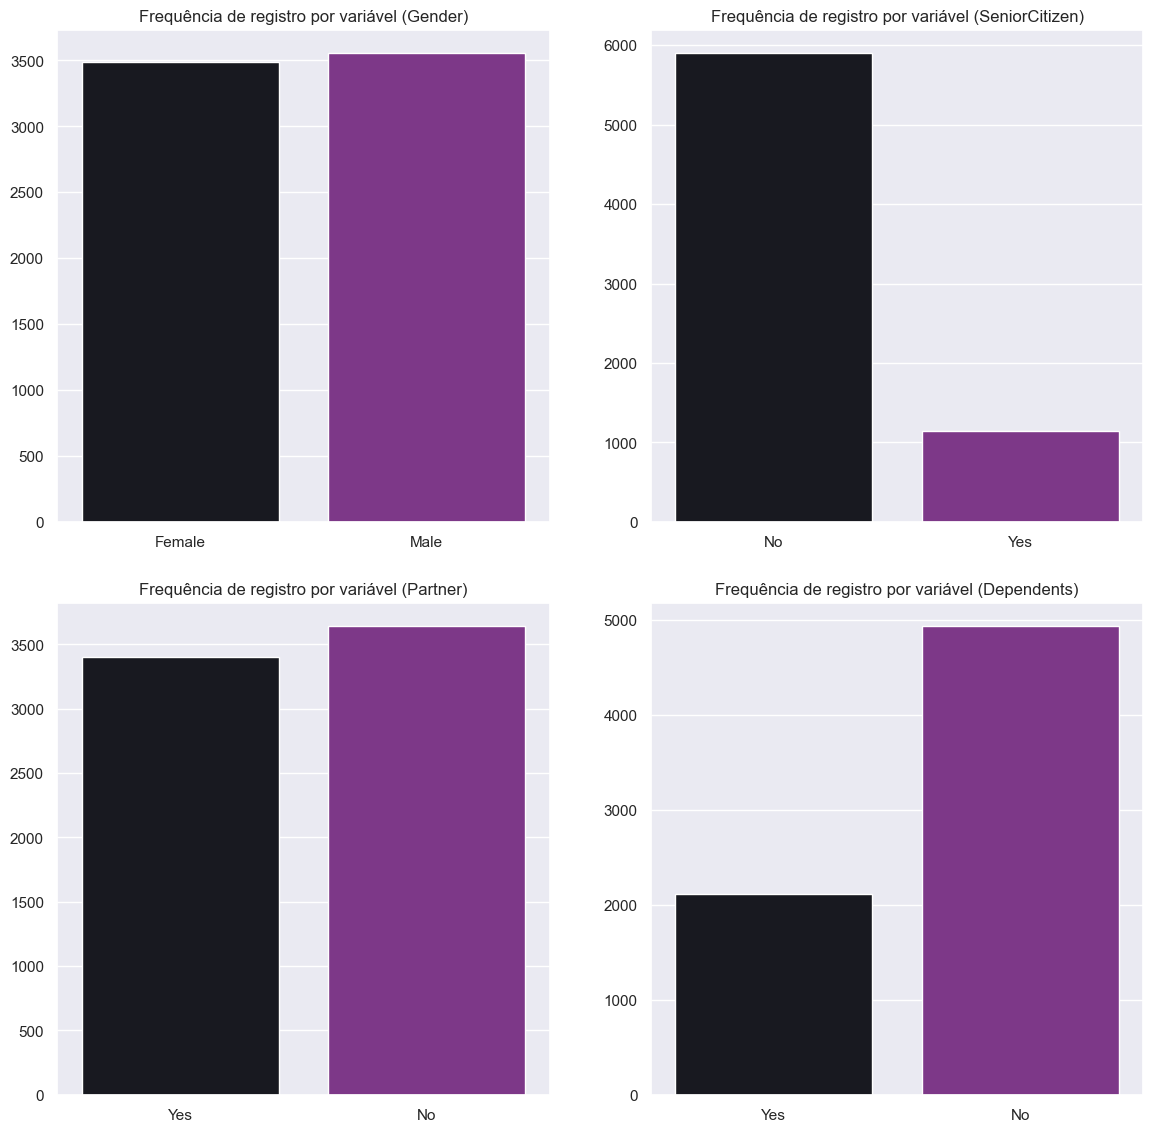

In [49]:
fig = plt.figure(figsize = (12,12))
sns.set(font_scale = 1.0)
sns.set_palette(sns.color_palette(colors))
for i in range(0,len(var_categoricas)-12):
    plt.subplot(2,2,i + 1)
    chart = sns.countplot(x=df2[var_categoricas[i]])    
    fig.tight_layout(pad = 2.0)
    chart.set_ylabel("")
    chart.set_xlabel("")
    chart.set_title(f'Frequência de registro por variável ({var_categoricas[i]})')    

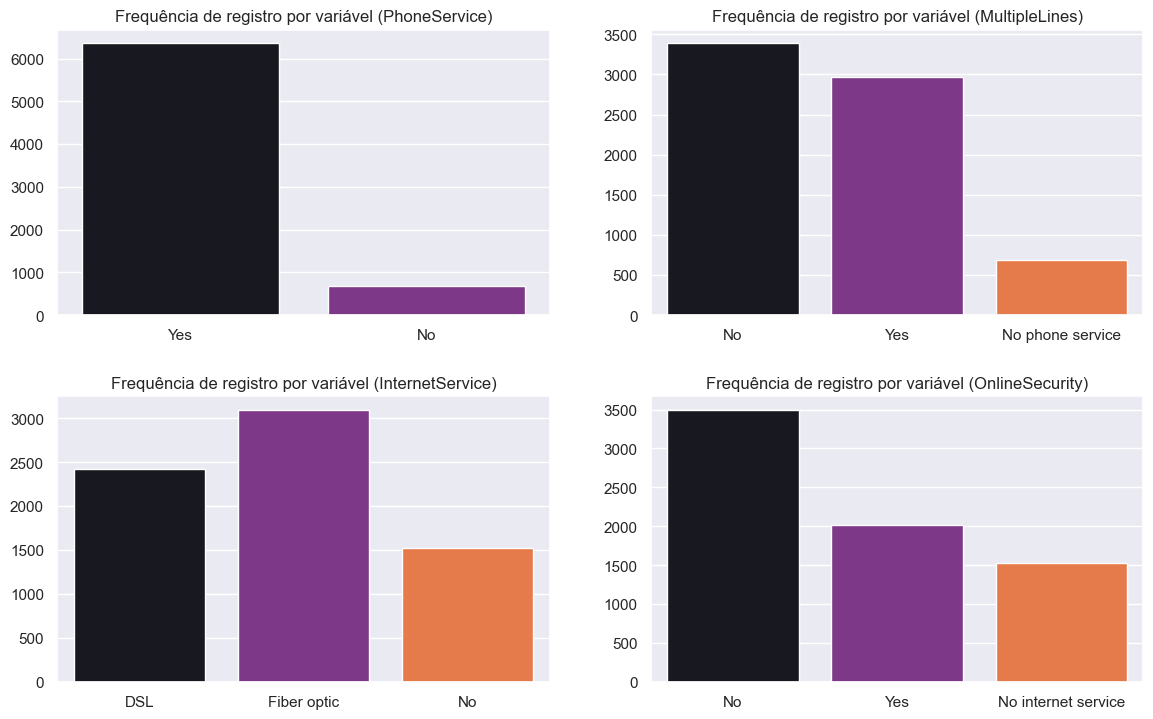

In [50]:
fig = plt.figure(figsize = (12,15))
sns.set(font_scale = 1.0)
sns.set_palette(sns.color_palette(colors))

for i in range(4,len(var_categoricas)-8):
    plt.subplot(4,2,i + 1)
    chart = sns.countplot(x=df2[var_categoricas[i]])
    fig.tight_layout(pad = 2.0)
    chart.set_ylabel("")
    chart.set_xlabel("")
    chart.set_title(f'Frequência de registro por variável ({var_categoricas[i]})')    

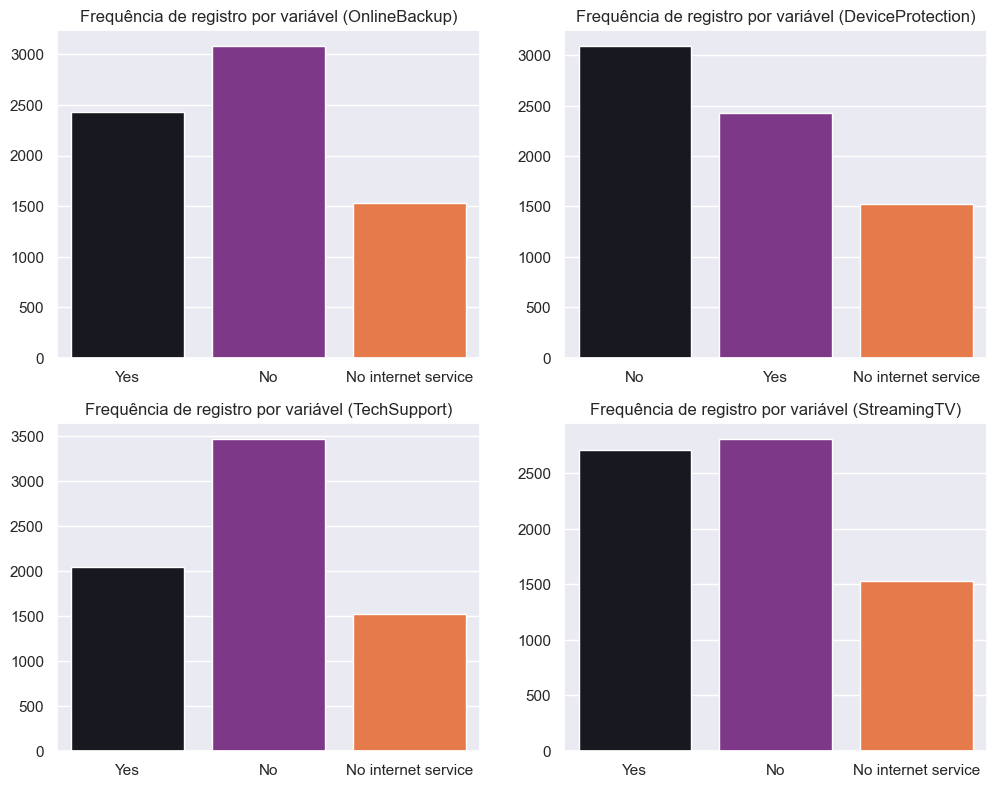

In [51]:
plt.figure(figsize = (12,40))
sns.set(font_scale = 1.0)
sns.set_palette(sns.color_palette(colors))
for i in range(8,len(var_categoricas)-4):
    plt.subplot(8,2,i + 1)
    chart = sns.countplot(x=df2[var_categoricas[i]])
    chart.set_ylabel("")
    chart.set_xlabel("")
    chart.set_title(f'Frequência de registro por variável ({var_categoricas[i]})')

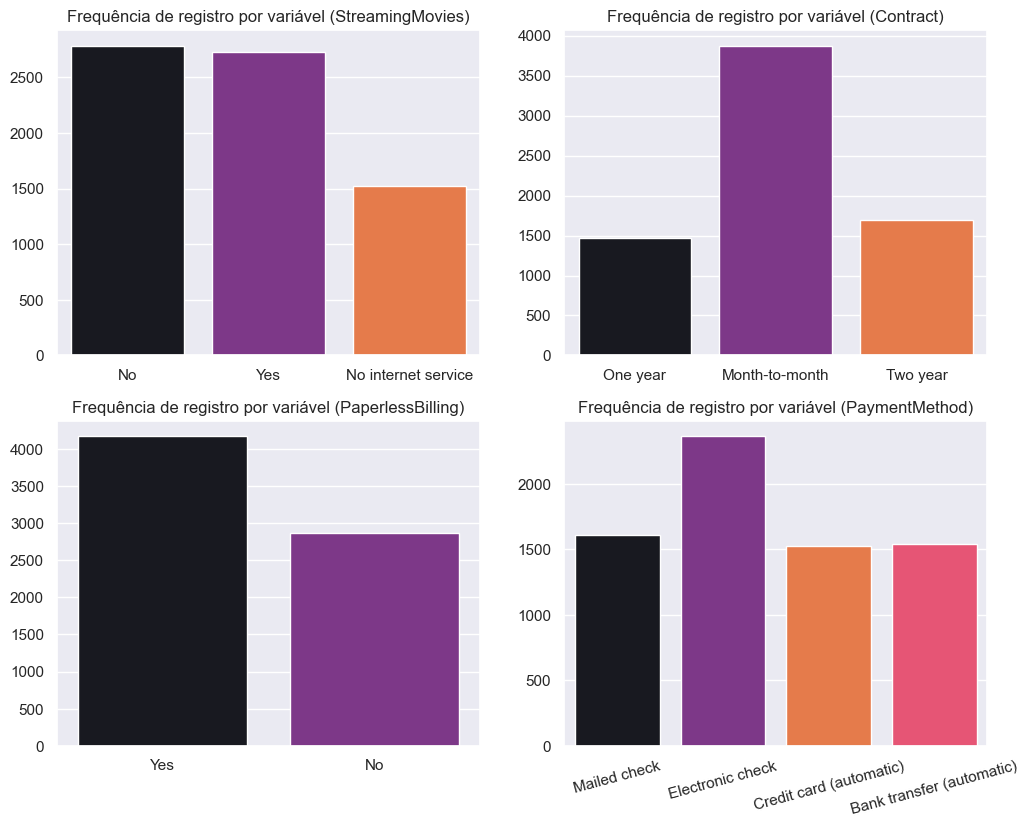

In [52]:
plt.figure(figsize = (12,60))
sns.set(font_scale = 1.0)
sns.set_palette(sns.color_palette(colors))
for i in range(12,len(var_categoricas)):
    plt.subplot(12,2,i + 1)
    chart = sns.countplot(x=df2[var_categoricas[i]])
    chart.set_ylabel("")
    chart.set_xlabel("")
    chart.set_title(f'Frequência de registro por variável ({var_categoricas[i]})')
    
    if i == 15:
        plt.xticks(rotation=15)    

## Variáveis Categóricas x Variável Alvo

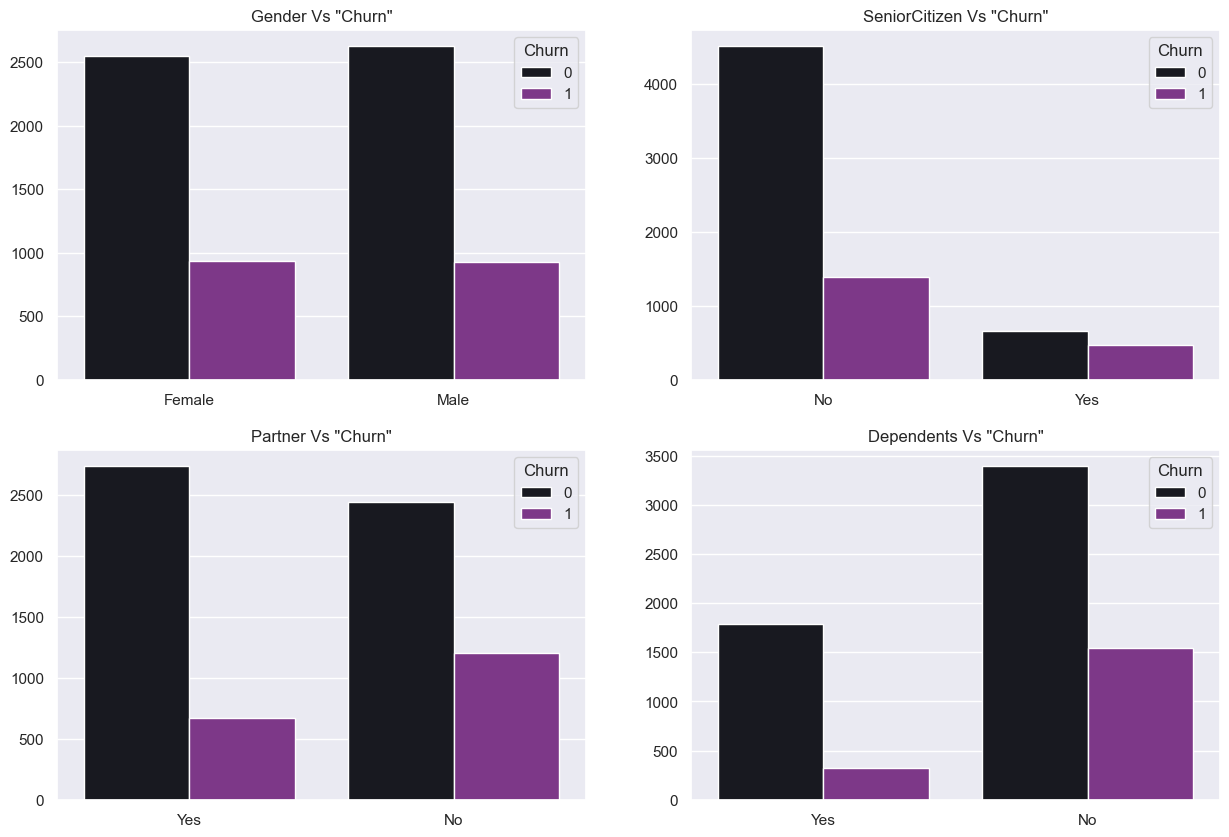

In [53]:
plt.figure(figsize = (15,10))
features = var_categoricas
sns.set(font_scale = 1.0)
sns.set_palette(sns.color_palette(colors))
for i in range(0, len(features)-12):
    plt.subplot(2, 2, i+1)
    chart = sns.countplot(data = df2, x = features[i], hue = 'Churn')
    chart.set_ylabel("")
    chart.set_xlabel("")
    chart.set_title(f'{var_categoricas[i]} Vs "Churn"')
    

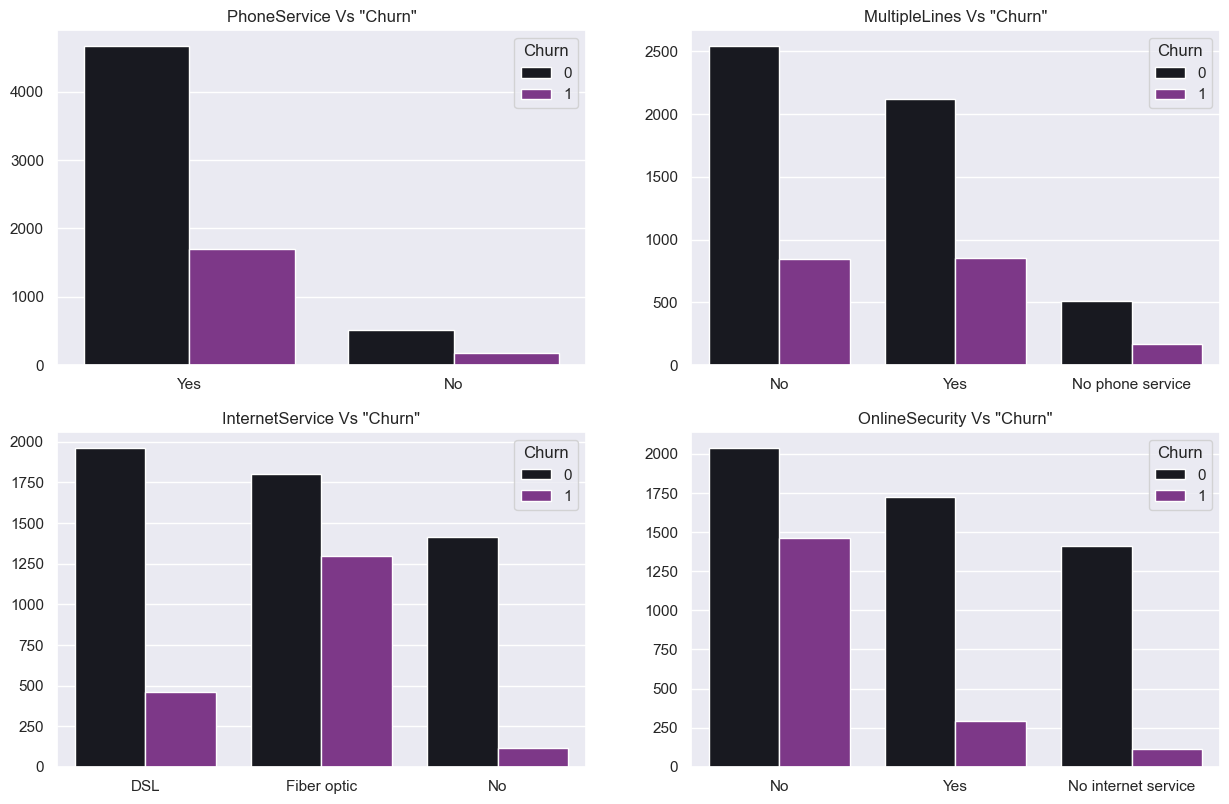

In [54]:
plt.figure(figsize = (15,20))
features = var_categoricas
sns.set(font_scale = 1.0)
sns.set_palette(sns.color_palette(colors))
for i in range(4, len(features)-8):
    plt.subplot(4, 2, i+1)
    chart = sns.countplot(data = df2, x = features[i], hue = 'Churn')
    chart.set_ylabel("")
    chart.set_xlabel("")
    chart.set_title(f'{var_categoricas[i]} Vs "Churn"')

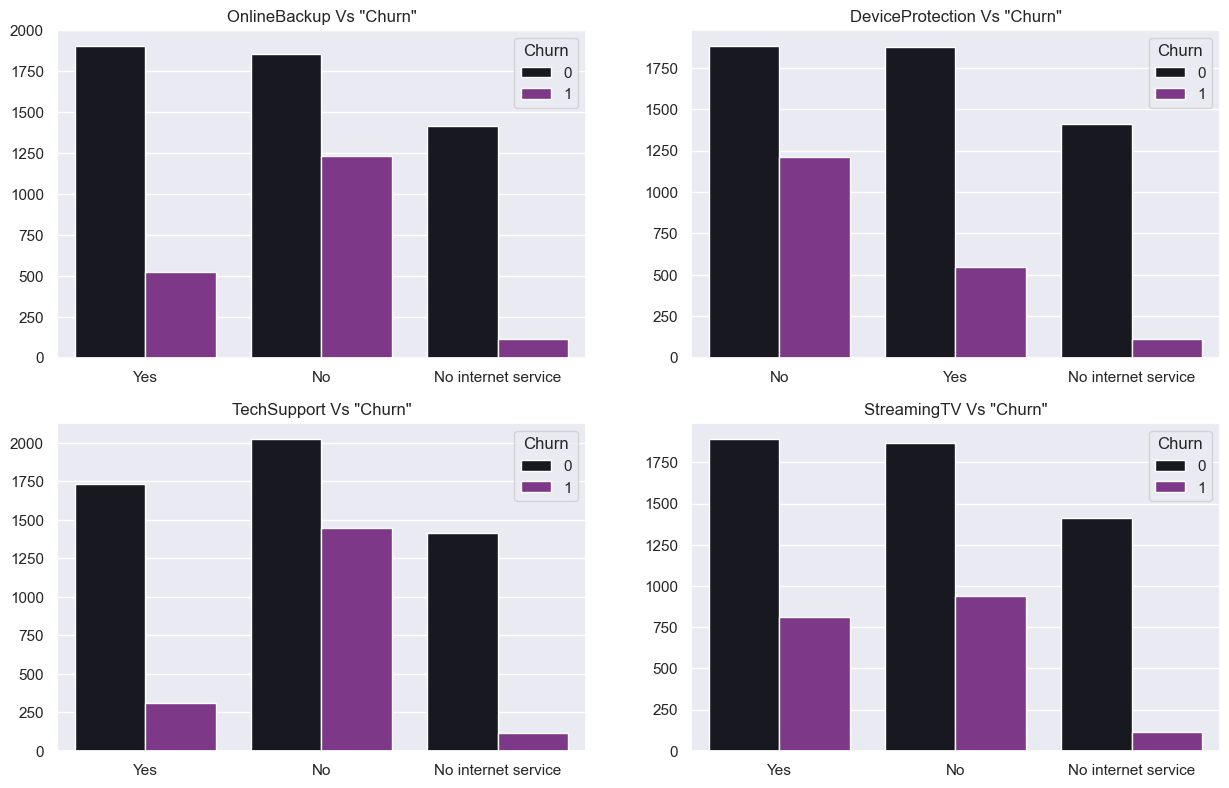

In [55]:
plt.figure(figsize = (15,40))
features = var_categoricas
sns.set(font_scale = 1.0)
sns.set_palette(sns.color_palette(colors))
for i in range(8, len(features)-4):
    plt.subplot(8, 2, i+1)
    chart = sns.countplot(data = df2, x = features[i], hue = 'Churn')
    chart.set_ylabel("")
    chart.set_xlabel("")
    chart.set_title(f'{var_categoricas[i]} Vs "Churn"')

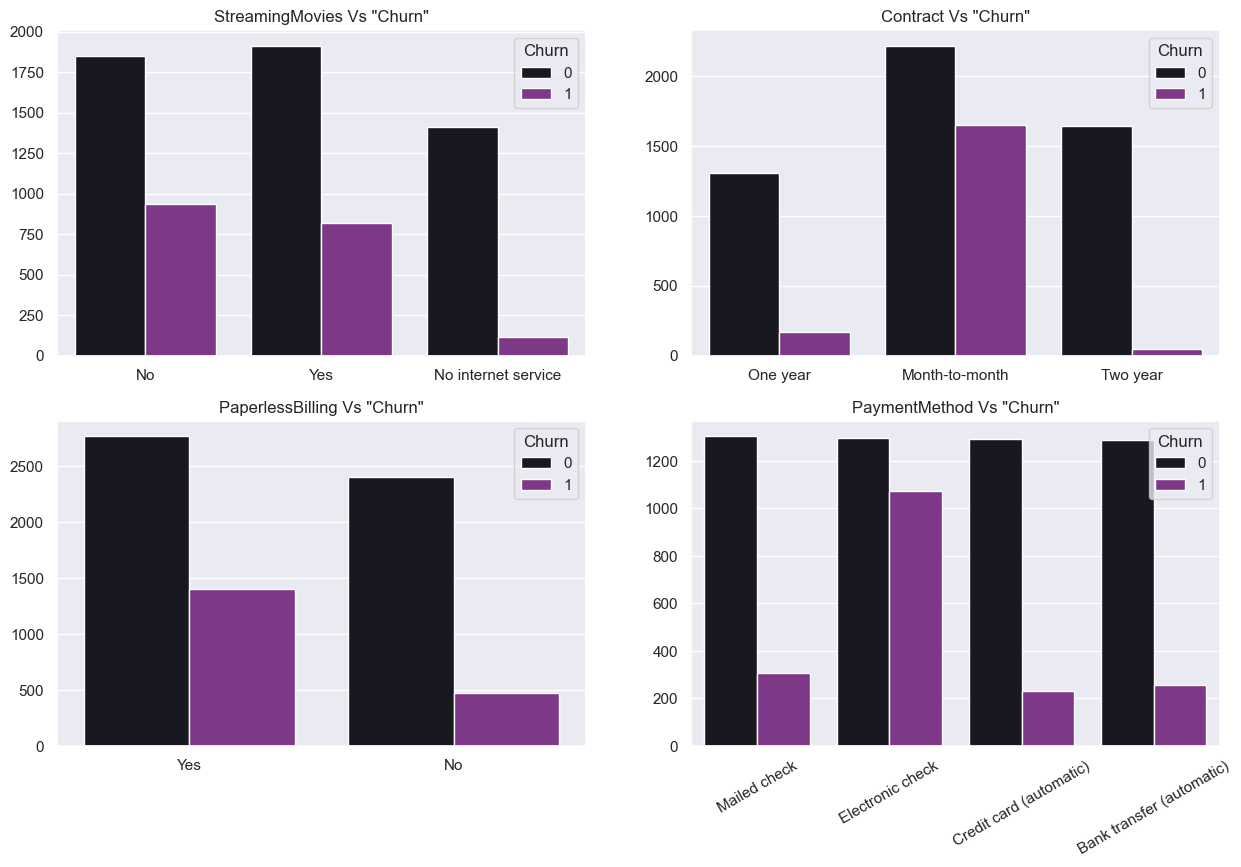

In [56]:
plt.figure(figsize = (15,60))
features = var_categoricas
sns.set(font_scale = 1.0)
sns.set_palette(sns.color_palette(colors))
for i in range(12, len(features)):
    plt.subplot(12, 2, i+1)
    chart = sns.countplot(data = df2, x = features[i], hue = 'Churn')
    chart.set_ylabel("")
    chart.set_xlabel("")
    chart.set_title(f'{var_categoricas[i]} Vs "Churn"')
    if i == 15:
        plt.xticks(rotation=30)    

## Visão Geral dos Dados Numéricos

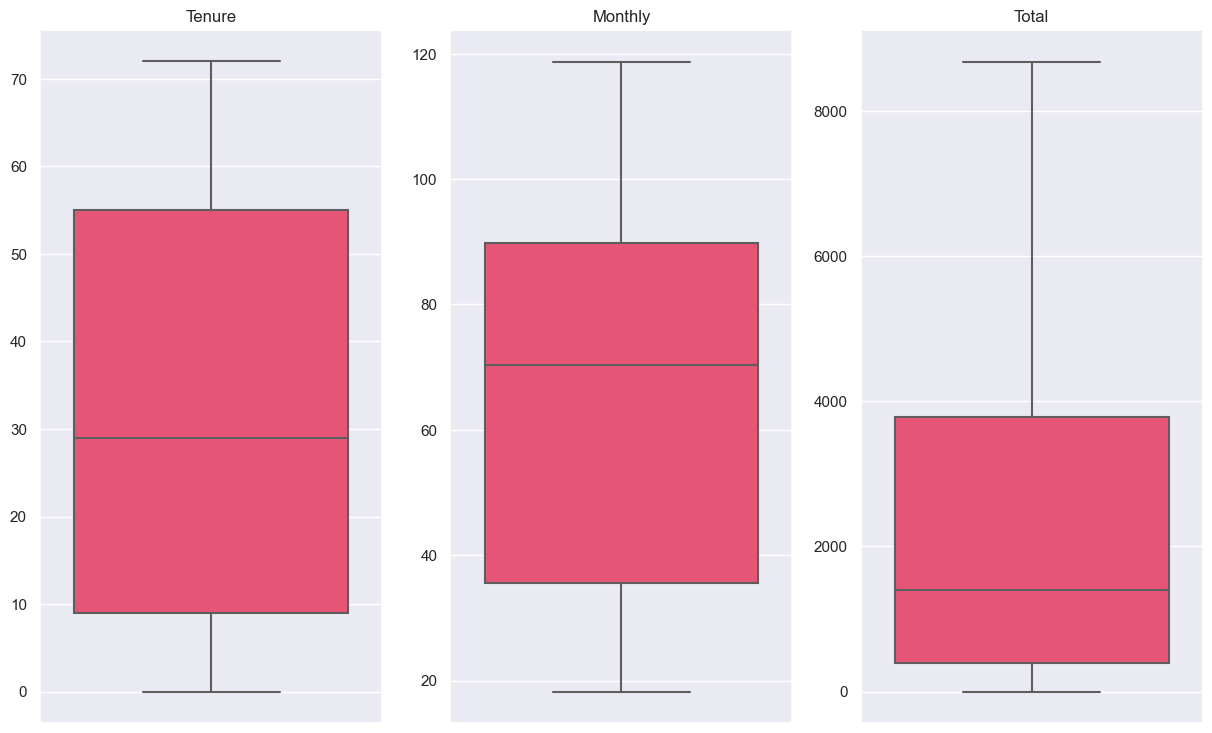

In [57]:
plt.figure(figsize = (15,9))
feat = var_numericas
for i in range(0,len(feat)):
    plt.subplot(1,3, i+1)
    chart = sns.boxplot(y = df2[feat[i]], color = '#fe3d67', orient = 'v')
    chart.set_ylabel("")
    chart.set_xlabel("")
    chart.set_title(f'{var_numericas[i]}')

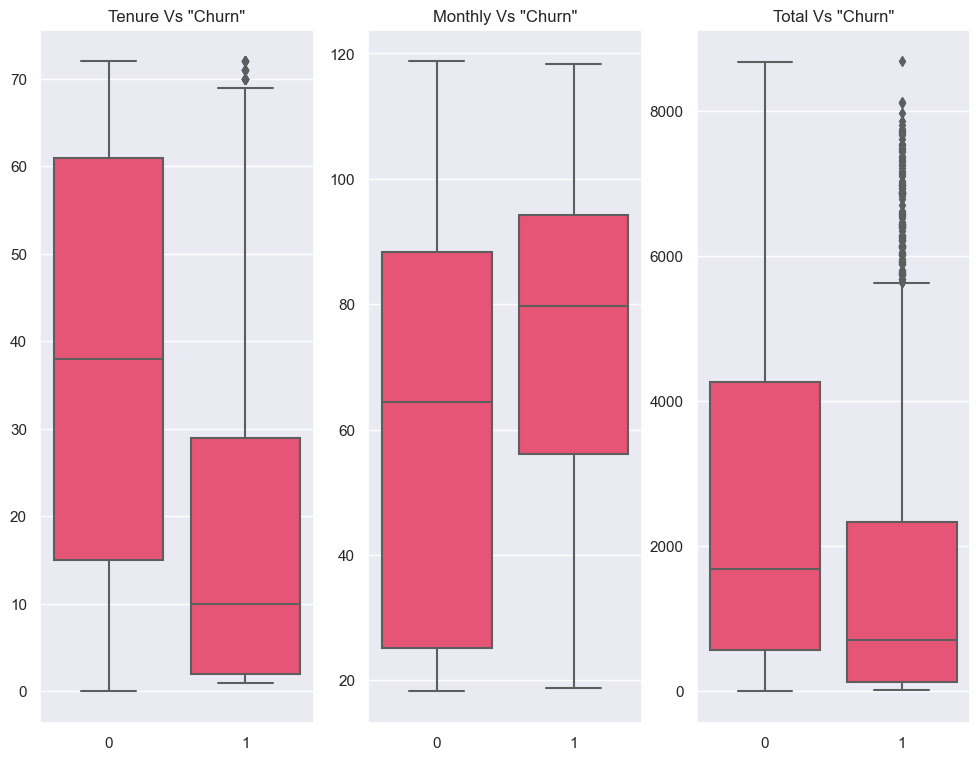

In [58]:
plt.figure(figsize = (12,9))
feat = var_numericas
for i in range(0,len(feat)):
    plt.subplot(1,3, i+1)
    chart = sns.boxplot(x= df2['Churn'], y = df2[feat[i]], color = '#fe3d67', orient = 'v')
    chart.set_ylabel("")
    chart.set_xlabel("")
    chart.set_title(f'{var_numericas[i]} Vs "Churn"')

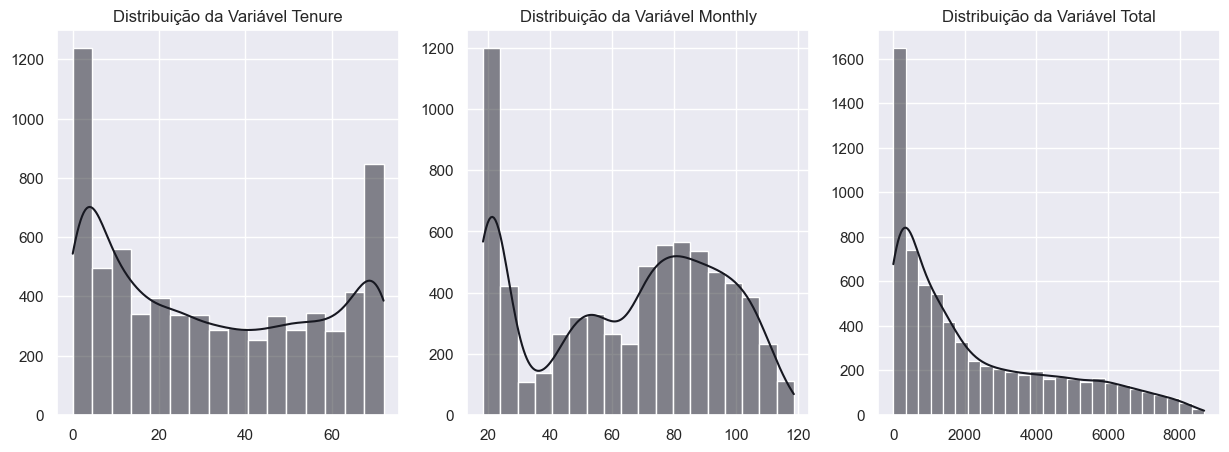

In [59]:
plt.figure(figsize = (15,5))
feat = var_numericas
for i in range(0,len(feat)):
    plt.subplot(1,3, i+1)
    chart = sns.histplot(data = df2, x = df2[feat[i]], kde = True)
    chart.set_ylabel('')
    chart.set_xlabel('')
    chart.set_title(f'Distribuição da Variável {feat[i]}')  

## Mapa de Correlação

In [60]:
df2.corr()

,Churn,Tenure,Monthly,Total
Churn,1.000000,-0.352229,0.193356,-0.198324
Tenure,-0.352229,1.000000,0.247900,0.826178
Monthly,0.193356,0.247900,1.000000,0.651174
Total,-0.198324,0.826178,0.651174,1.000000


In [61]:
corr_df = df2.corr()
corr_df

,Churn,Tenure,Monthly,Total
Churn,1.000000,-0.352229,0.193356,-0.198324
Tenure,-0.352229,1.000000,0.247900,0.826178
Monthly,0.193356,0.247900,1.000000,0.651174
Total,-0.198324,0.826178,0.651174,1.000000


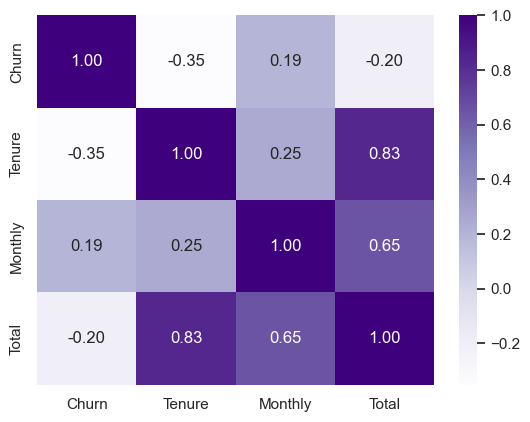

In [62]:
sns.heatmap(data = corr_df, cmap = 'Purples', annot= True, fmt = '.2f')
plt.show()

## Pair Plot

<Figure size 1500x1500 with 0 Axes>

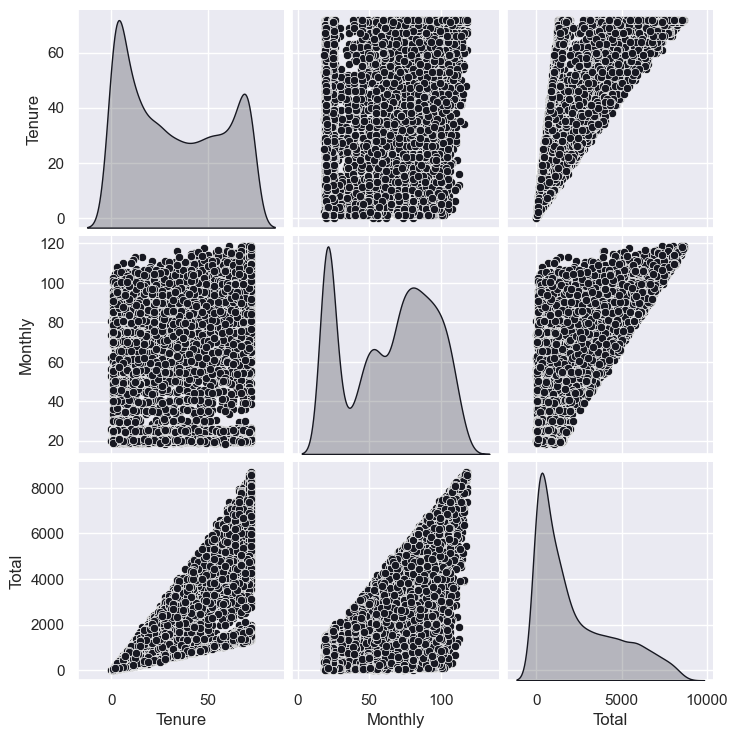

In [63]:
plt.figure(figsize = (15, 15))
sns.pairplot(df2[var_numericas], diag_kind = 'kde')
plt.show()

## Visão Geral da Variável Alvo

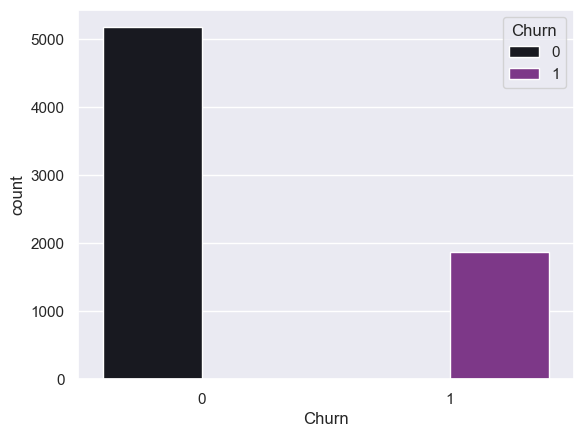

In [64]:
sns.countplot(data = df2, x= df2['Churn'], hue = 'Churn')
plt.show()

# Análise Exploratória de Dados - Parte II 
Objetivo: Analisar a relação entre as variáveis categóricas com a variável alvo, de forma percentual.
Foi realizado o teste do Chi Quadrado para verificar quais variáveis são dependentes e independentes
Depois foram criadas tabelas de contingência e seus respectivos gráficos para confirmar quais as variáveis que influenciam na Taxa de Churn


## Teste do Qui Quadrado
É um teste estatístico que consiste em verificar a indepedência/ dependência entre as variáveis qualitativas, ou seja, se as variáveis possuem relação com a outra.

Iremos analisar a relação entre as variáveis categóricas com a variável alvo.

A hipótese nula do teste é que as variáveis são independentes (não possuem relação entre si)
A hipótese alternativa do teste é que as variáveis são dependentes. (possuem relação entre si)

Ao rejeitar a hipótese nula, conclui-se que temos evidência significativa para rejeitá-la, e portanto, aceitamos a hipótese alternativa.

O nível de significância que iremos assumir é de 5%. 

Se o "valor p" do teste for menor que 5% Rejeitamos a hipótese nula
Se o "valor p" do teste for maior que 5% Aceitamos a hipótese nula


Usaremos o método <b>chi2_contingency</b>, que retorna os valores:

<b>stat</b> = Resultado da fórmula qui-quadrado \
<b>p</b> = é o valor-p \
<b>dof</b> = degrees of freedom \
<b>expected</b> = valor esperado


#### Criando a tabela de contingência com crosstab

In [65]:
qui_quadrado_resultados = []
alfa = float(0.05)
for i in range(len(var_categoricas)):
    cross_table = pd.crosstab([df2[var_categoricas[i]]], df2.Churn, margins = False)
    stat, p, dof, expected = chi2_contingency(cross_table)
    if p <= alfa:
        qui_quadrado_resultados.append(f'A coluna {var_categoricas[i]} é dependente. Rejeitamos H0. Valor-p: {p:.3f}')
    else:
        qui_quadrado_resultados.append(f'A coluna {var_categoricas[i]} é independente. Aceitamos H0.  Valor-p: {p:.3f}')    

In [66]:
# Estes são os resultados:

qui_quadrado_resultados

['A coluna Gender é independente. Aceitamos H0.  Valor-p: 0.487',
 'A coluna SeniorCitizen é dependente. Rejeitamos H0. Valor-p: 0.000',
 'A coluna Partner é dependente. Rejeitamos H0. Valor-p: 0.000',
 'A coluna Dependents é dependente. Rejeitamos H0. Valor-p: 0.000',
 'A coluna PhoneService é independente. Aceitamos H0.  Valor-p: 0.339',
 'A coluna MultipleLines é dependente. Rejeitamos H0. Valor-p: 0.003',
 'A coluna InternetService é dependente. Rejeitamos H0. Valor-p: 0.000',
 'A coluna OnlineSecurity é dependente. Rejeitamos H0. Valor-p: 0.000',
 'A coluna OnlineBackup é dependente. Rejeitamos H0. Valor-p: 0.000',
 'A coluna DeviceProtection é dependente. Rejeitamos H0. Valor-p: 0.000',
 'A coluna TechSupport é dependente. Rejeitamos H0. Valor-p: 0.000',
 'A coluna StreamingTV é dependente. Rejeitamos H0. Valor-p: 0.000',
 'A coluna StreamingMovies é dependente. Rejeitamos H0. Valor-p: 0.000',
 'A coluna Contract é dependente. Rejeitamos H0. Valor-p: 0.000',
 'A coluna PaperlessB

<b> Para explicar o que foi feito acima, pegaremos o EXEMPLO da variável Payment Method:</b> Nós temos na <b> Figura 1</b> abaixo, a tabela de contingência referente ao Payment Method. Que foi criada com o "crosstab" do Pandas. Os valores da tabela chamamos de <b>Valores Observados.</b>
E calculamos os <b>"Valores Esperados"</b>, que são os valores que seriam vistos caso o Payment Method não influenciasse nas proporções de Taxa Churn. Para calcular, é usada a fórmula abaixo:

(Total Linha * Total Coluna) / Total Geral.

Os <b> valores esperados da tabela de contingência podem ser vistos na Figura 2.</b>


Depois aplicamos a <b>fórmula do teste estatístico Qui-Quadrado.</b> Utilizando os Valores Observados e Valores Esperados.
A fórmula é a somatória da diferença entre os valores observados e esperados ao quadrado, dividido pelo valor esperado. Como é mostrado na <b> Figura 3.</b>

Também precisamos saber o <b> Grau de Liberdade (Degree of Freedom)</b> que é dado pela fórmula abaixo:

(nº de linhas - 1) (nº de colunas - 1)

Precisamos encontrar o <b>valor-p</b>, que é a probabilidade de que um evento extremo ocorra, dado que a hipótese nula é verdadeira.

Para isso, podemos verificar a tabela na <b>figura 4</b>, mostrando os valores respectivos para cada valor-p.

Estabelecemos que consideraríamos um nível de significância de 5%. Este é o valor p que buscamos para aceitar ou rejeitar a hipótese nula, se o valor-p for maior que 5%, aceitamos a hipótese nula, se não, rejeitamos.

Olhando na figura 4, o valor-p de 5% (0,05) é equivalente a 7.815, quando o grau de liberdade é 3.

O teste estatístico para esta tabela de contingência deu um valor de 648.1423274814, este valor é muito maior que 7.815, por isso ele se encontra em um valor-p bem pequeno, como vemos na figura os valores-p vão diminuindo a medida que os valores aumentam.


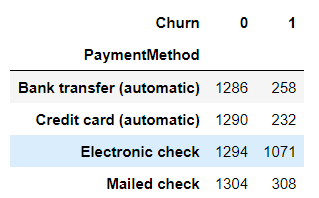

In [67]:
# FIGURA 1
Image('imagens/cross-table.png')

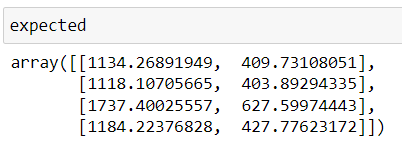

In [68]:
# FIGURA 2
Image('imagens/expected.png')

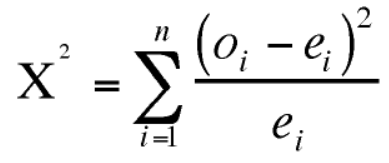

In [69]:
# Figura 3
Image('imagens/chi-square.png')

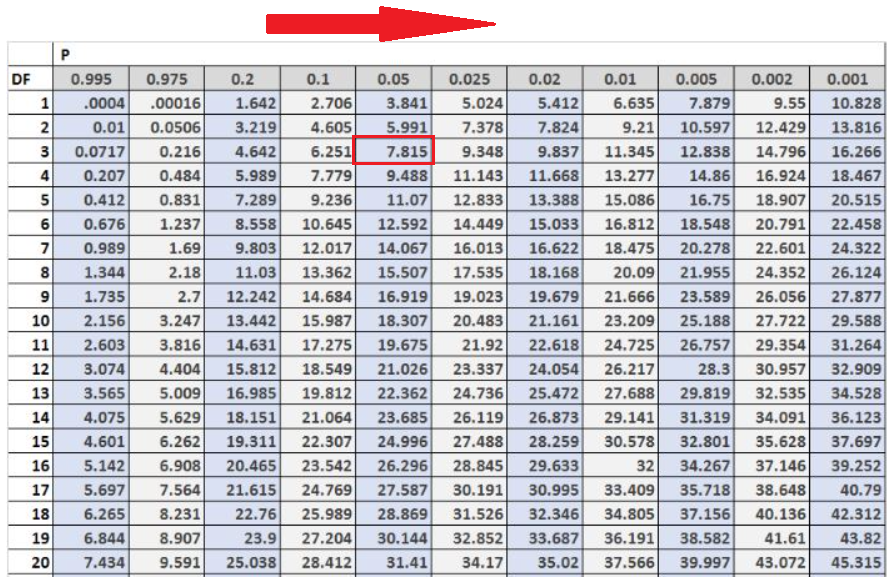

In [70]:
# Figura 4

Image('imagens/valor-p.png')

## Criando as tabelas de Contigência com Group BY

In [71]:
var_categoricas

['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [72]:
tb_lista = []
for i in range(len(var_categoricas)):
    tb_group1 = df2.groupby(['Churn', var_categoricas[i]]).agg({'CustomerID': 'nunique'}).reset_index()
    tb_group2 = df2.groupby(['Churn']).agg({'CustomerID': 'nunique'}).reset_index()
    tb_group3 = tb_group1.merge(tb_group2, on= 'Churn')
    tb_group4 = df2.groupby([var_categoricas[i]]).agg({'CustomerID': 'nunique'}).reset_index()
    tb_group5 = tb_group1.merge(tb_group4, on = var_categoricas[i])
    tb_group5['Percentual(%)'] = tb_group5['CustomerID_x'] / tb_group5['CustomerID_y'] * 100
    tb_lista.append(tb_group5)
    del tb_group1,tb_group2,tb_group3,tb_group4,tb_group5

## Mostrando a proporção da Taxa de Churn entre as variáveis categóricas - Tabelas e Gráficos

###  Variável "Gender"

In [73]:
tb_lista[0]

,Churn,Gender,CustomerID_x,CustomerID_y,Percentual(%)
0,0,Female,2549,3488,73.079128
1,1,Female,939,3488,26.920872
2,0,Male,2625,3555,73.839662
3,1,Male,930,3555,26.160338


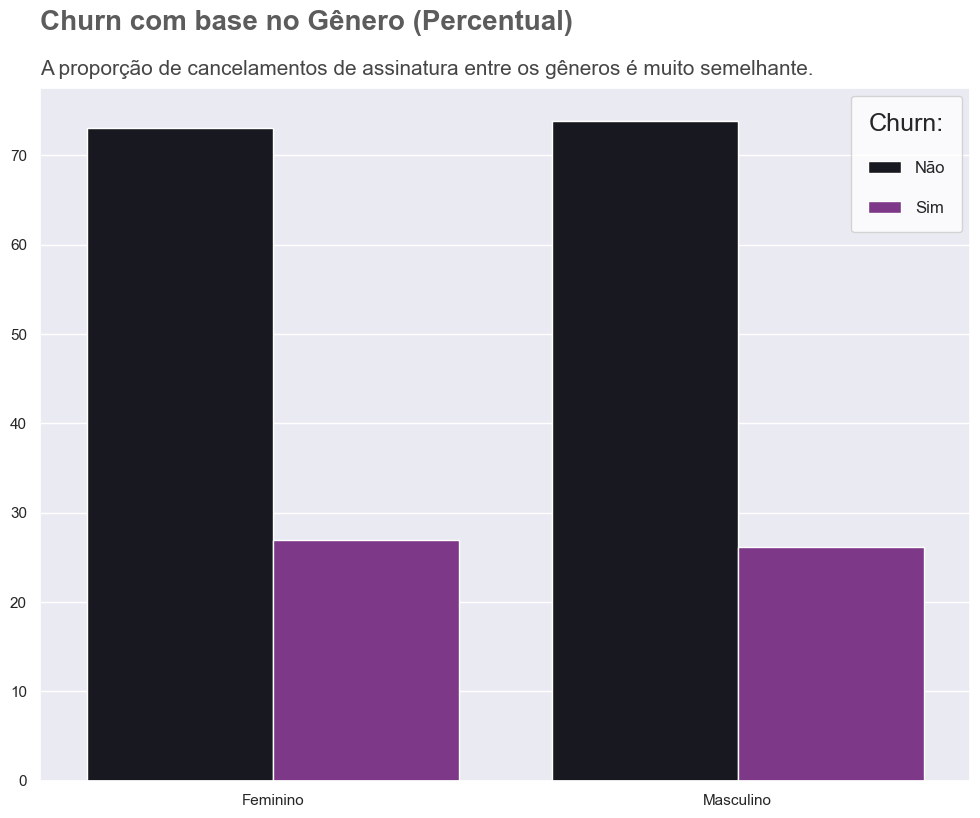

In [74]:
plt.figure(figsize = (12,9))
chart = sns.barplot(data = tb_lista[0],
                    x = 'Gender',
                    y = 'Percentual(%)',
                    hue= 'Churn')

sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))
chart.set_xlabel("")
chart.set_ylabel("")
chart.set_xticklabels(["Feminino", "Masculino"])


leg = plt.legend(loc = 'upper right',
           borderpad = 1.0,
           labelspacing = 1.5,
           fontsize = 12,
           title = 'Churn:')

leg.get_texts()[0].set_text("Não")

leg.get_texts()[1].set_text("Sim")


chart.text(x = -0.5,
          y = 84,
          s = "Churn com base no Gênero (Percentual)",
          fontsize = 20,
          weight = 'bold',
          alpha = .75)

chart.text(x = -0.5,
          y = 79,
          s = "A proporção de cancelamentos de assinatura entre os gêneros é muito semelhante.",
          fontsize = 15,
          alpha = .85)
plt.show()

###  Variável "SeniorCitizen" 

In [75]:
tb_lista[1]

,Churn,SeniorCitizen,CustomerID_x,CustomerID_y,Percentual(%)
0,0,No,4508,5901,76.393832
1,1,No,1393,5901,23.606168
2,0,Yes,666,1142,58.318739
3,1,Yes,476,1142,41.681261


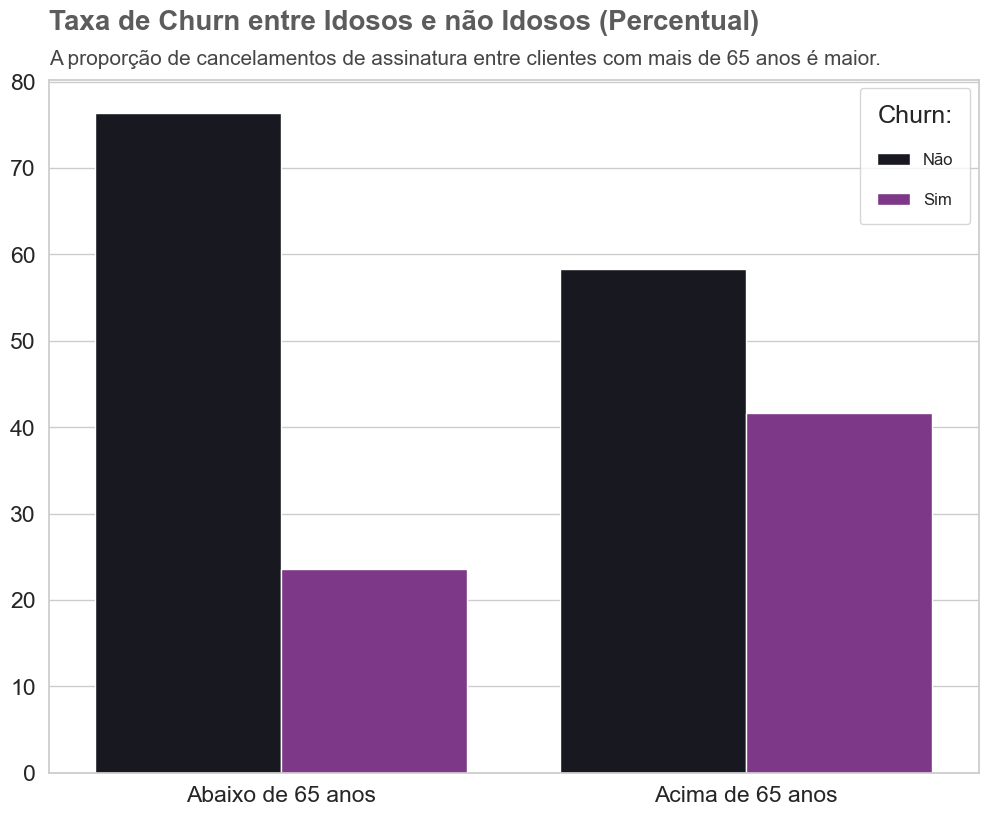

In [76]:
plt.figure(figsize = (12,9))
chart = sns.barplot(data = tb_lista[1],
                    x = 'SeniorCitizen',
                    y = 'Percentual(%)',
                    hue= 'Churn')

sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))
chart.set_xlabel("")
chart.set_ylabel("")
chart.set_xticklabels(["Abaixo de 65 anos", "Acima de 65 anos"])

leg = plt.legend(loc = 'upper right',
           borderpad = 1.0,
           labelspacing = 1.5,
           fontsize = 12,
           title = 'Churn:')

leg.get_texts()[0].set_text("Não")

leg.get_texts()[1].set_text("Sim")


chart.text(x = -0.5,
          y = 86,
          s = "Taxa de Churn entre Idosos e não Idosos (Percentual)",
          fontsize = 20,
          weight = 'bold',
          alpha = .75)

chart.text(x = -0.5,
          y = 82,
          s = "A proporção de cancelamentos de assinatura entre clientes com mais de 65 anos é maior.",
          fontsize = 15,
          alpha = .85)
plt.show()

###  Variável "Partner"

In [77]:
tb_lista[2]

,Churn,Partner,CustomerID_x,CustomerID_y,Percentual(%)
0,0,No,2441,3641,67.042021
1,1,No,1200,3641,32.957979
2,0,Yes,2733,3402,80.335097
3,1,Yes,669,3402,19.664903


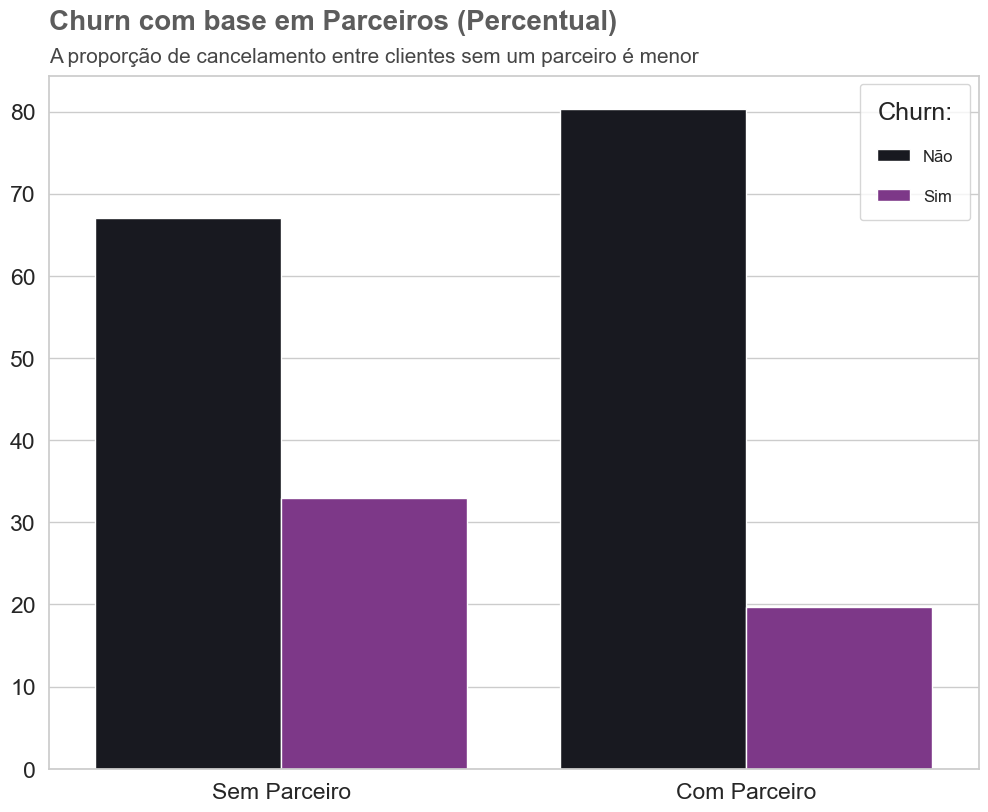

In [78]:
plt.figure(figsize = (12,9))
chart = sns.barplot(data = tb_lista[2],
                    x = 'Partner',
                    y = 'Percentual(%)',
                    hue= 'Churn')

sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))
chart.set_xlabel("")
chart.set_ylabel("")
chart.set_xticklabels(["Sem Parceiro", "Com Parceiro"])


leg = plt.legend(loc = 'upper right',
           borderpad = 1.0,
           labelspacing = 1.5,
           fontsize = 12,
           title = 'Churn:')

leg.get_texts()[0].set_text("Não")

leg.get_texts()[1].set_text("Sim")


chart.text(x = -0.5,
          y = 90,
          s = "Churn com base em Parceiros (Percentual)",
          fontsize = 20,
          weight = 'bold',
          alpha = .75)

chart.text(x = -0.5,
          y = 86,
          s = "A proporção de cancelamento entre clientes sem um parceiro é menor",
          fontsize = 15,
          alpha = .85)
plt.show()

### Variável "Dependents" 

In [79]:
tb_lista[3]

,Churn,Dependents,CustomerID_x,CustomerID_y,Percentual(%)
0,0,No,3390,4933,68.720860
1,1,No,1543,4933,31.279140
2,0,Yes,1784,2110,84.549763
3,1,Yes,326,2110,15.450237


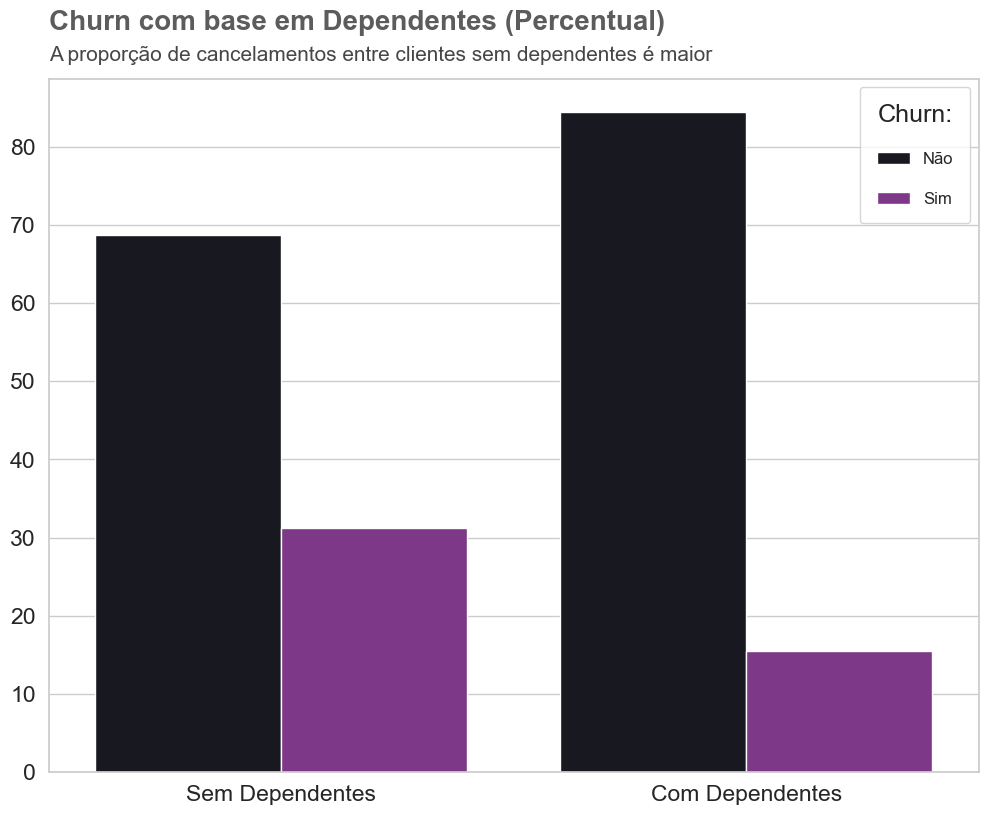

In [80]:
plt.figure(figsize = (12,9))
chart = sns.barplot(data = tb_lista[3],
                    x = 'Dependents',
                    y = 'Percentual(%)',
                    hue= 'Churn')

sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))
chart.set_xlabel("")
chart.set_ylabel("")
chart.set_xticklabels(["Sem Dependentes", "Com Dependentes"])

leg = plt.legend(loc = 'upper right',
           borderpad = 1.0,
           labelspacing = 1.5,
           fontsize = 12,
           title = 'Churn:')

leg.get_texts()[0].set_text("Não")

leg.get_texts()[1].set_text("Sim")


chart.text(x = -0.5,
          y = 95,
          s = "Churn com base em Dependentes (Percentual)",
          fontsize = 20,
          weight = 'bold',
          alpha = .75)

chart.text(x = -0.5,
          y = 91,
          s = "A proporção de cancelamentos entre clientes sem dependentes é maior",
          fontsize = 15,
          alpha = .85)
plt.show()

###  Variável "PhoneService"

In [81]:
tb_lista[4]

,Churn,PhoneService,CustomerID_x,CustomerID_y,Percentual(%)
0,0,No,512,682,75.073314
1,1,No,170,682,24.926686
2,0,Yes,4662,6361,73.290363
3,1,Yes,1699,6361,26.709637


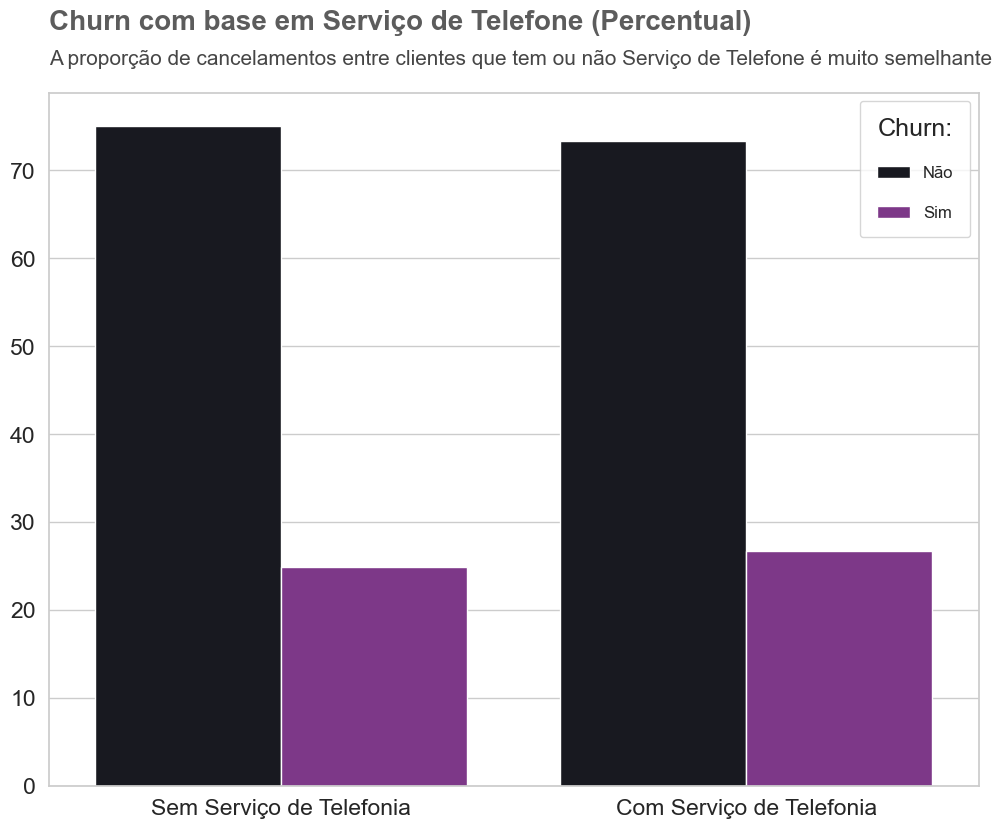

In [82]:
plt.figure(figsize = (12,9))
chart = sns.barplot(data = tb_lista[4],
                    x = 'PhoneService',
                    y = 'Percentual(%)',
                    hue= 'Churn')

sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))
chart.set_xlabel("")
chart.set_ylabel("")
chart.set_xticklabels(["Sem Serviço de Telefonia", "Com Serviço de Telefonia"])

leg = plt.legend(loc = 'upper right',
           borderpad = 1.0,
           labelspacing = 1.5,
           fontsize = 12,
           title = 'Churn:')

leg.get_texts()[0].set_text("Não")

leg.get_texts()[1].set_text("Sim")


chart.text(x = -0.5,
          y = 86,
          s = "Churn com base em Serviço de Telefone (Percentual)",
          fontsize = 20,
          weight = 'bold',
          alpha = .75)

chart.text(x = -0.5,
          y = 82,
          s = "A proporção de cancelamentos entre clientes que tem ou não Serviço de Telefone é muito semelhante",
          fontsize = 15,
          alpha = .85)
plt.show()

###  Variável "MultipleLines"

In [83]:
tb_lista[5]

,Churn,MultipleLines,CustomerID_x,CustomerID_y,Percentual(%)
0,0,No,2541,3390,74.955752
1,1,No,849,3390,25.044248
2,0,No phone service,512,682,75.073314
3,1,No phone service,170,682,24.926686
4,0,Yes,2121,2971,71.390104
5,1,Yes,850,2971,28.609896


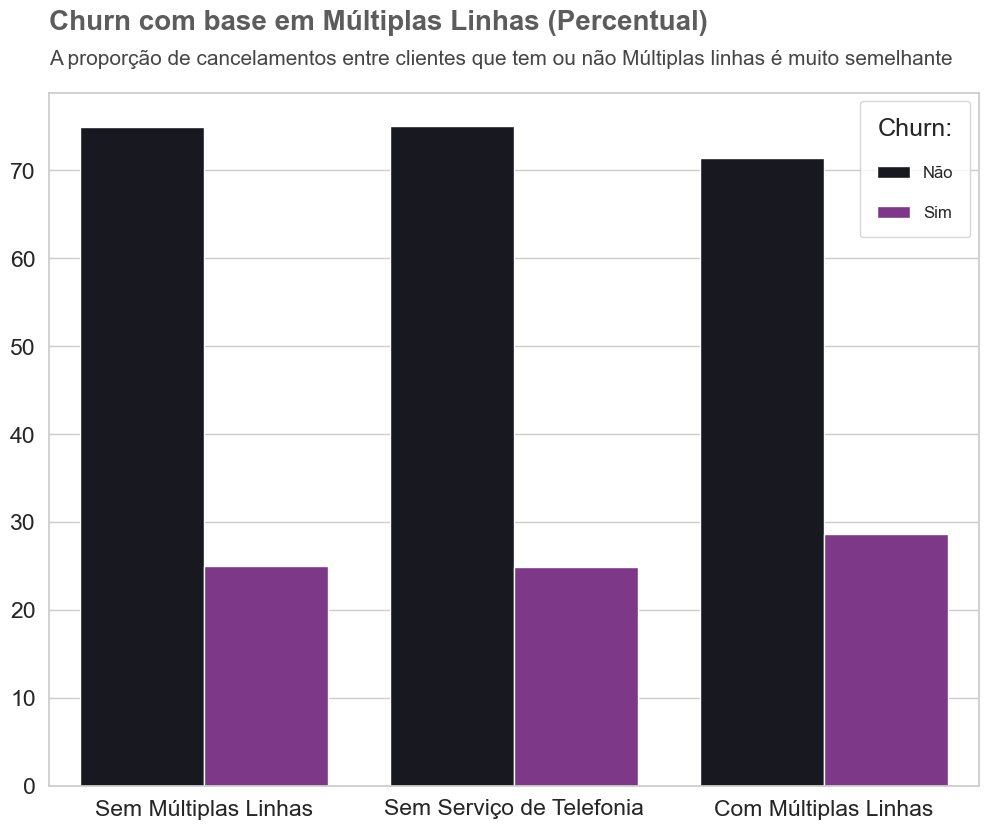

In [84]:
plt.figure(figsize = (12,9))
chart = sns.barplot(data = tb_lista[5],
                    x = 'MultipleLines',
                    y = 'Percentual(%)',
                    hue= 'Churn')

sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))
chart.set_xlabel("")
chart.set_ylabel("")
chart.set_xticklabels(["Sem Múltiplas Linhas", "Sem Serviço de Telefonia", "Com Múltiplas Linhas"])

leg = plt.legend(loc = 'upper right',
           borderpad = 1.0,
           labelspacing = 1.5,
           fontsize = 12,
           title = 'Churn:')

leg.get_texts()[0].set_text("Não")

leg.get_texts()[1].set_text("Sim")


chart.text(x = -0.5,
          y = 86,
          s = "Churn com base em Múltiplas Linhas (Percentual)",
          fontsize = 20,
          weight = 'bold',
          alpha = .75)

chart.text(x = -0.5,
          y = 82,
          s = "A proporção de cancelamentos entre clientes que tem ou não Múltiplas linhas é muito semelhante",
          fontsize = 15,
          alpha = .85)
plt.show()

### Variável "InternetService" 

In [85]:
tb_lista[6]

,Churn,InternetService,CustomerID_x,CustomerID_y,Percentual(%)
0,0,DSL,1962,2421,81.040892
1,1,DSL,459,2421,18.959108
2,0,Fiber optic,1799,3096,58.107235
3,1,Fiber optic,1297,3096,41.892765
4,0,No,1413,1526,92.595020
5,1,No,113,1526,7.404980


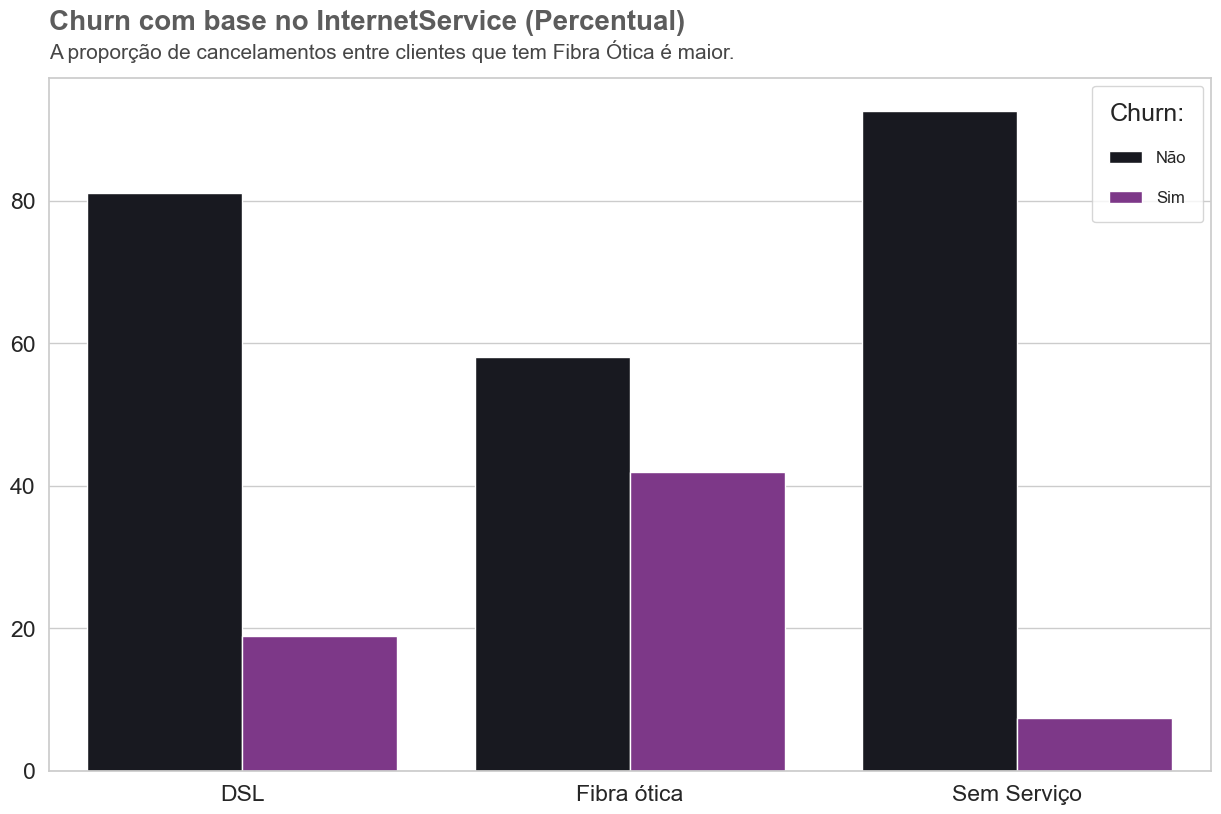

In [86]:
plt.figure(figsize = (15,9))
chart = sns.barplot(data = tb_lista[6],
                    x = 'InternetService',
                    y = 'Percentual(%)',
                    hue= 'Churn')

sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))
chart.set_xlabel("")
chart.set_ylabel("")
chart.set_xticklabels(["DSL", "Fibra ótica", "Sem Serviço"])

leg = plt.legend(loc = 'upper right',
           borderpad = 1.0,
           labelspacing = 1.5,
           fontsize = 12,
           title = 'Churn:')

leg.get_texts()[0].set_text("Não")

leg.get_texts()[1].set_text("Sim")


chart.text(x = -0.5,
          y = 104,
          s = "Churn com base no InternetService (Percentual)",
          fontsize = 20,
          weight = 'bold',
          alpha = .75)

chart.text(x = -0.5,
          y = 100,
          s = "A proporção de cancelamentos entre clientes que tem Fibra Ótica é maior.",
          fontsize = 15,
          alpha = .85)
plt.show()

###  Variável "OnlineSecurity" 

In [87]:
tb_lista[7]

,Churn,OnlineSecurity,CustomerID_x,CustomerID_y,Percentual(%)
0,0,No,2037,3498,58.233276
1,1,No,1461,3498,41.766724
2,0,No internet service,1413,1526,92.595020
3,1,No internet service,113,1526,7.404980
4,0,Yes,1724,2019,85.388806
5,1,Yes,295,2019,14.611194


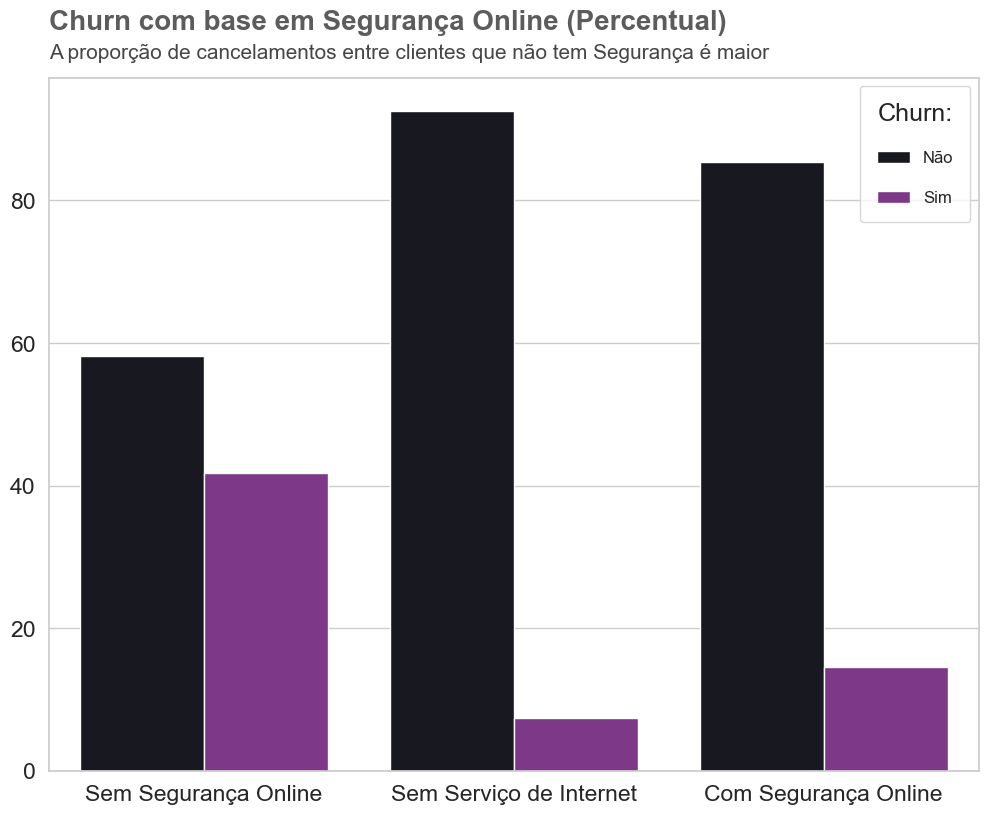

In [88]:
plt.figure(figsize = (12,9))
chart = sns.barplot(data = tb_lista[7],
                    x = 'OnlineSecurity',
                    y = 'Percentual(%)',
                    hue= 'Churn')

sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))
chart.set_xlabel("")
chart.set_ylabel("")
chart.set_xticklabels(["Sem Segurança Online", "Sem Serviço de Internet", "Com Segurança Online"])

leg = plt.legend(loc = 'upper right',
           borderpad = 1.0,
           labelspacing = 1.5,
           fontsize = 12,
           title = 'Churn:')

leg.get_texts()[0].set_text("Não")

leg.get_texts()[1].set_text("Sim")


chart.text(x = -0.5,
          y = 104,
          s = "Churn com base em Segurança Online (Percentual)",
          fontsize = 20,
          weight = 'bold',
          alpha = .75)

chart.text(x = -0.5,
          y = 100,
          s = "A proporção de cancelamentos entre clientes que não tem Segurança é maior",
          fontsize = 15,
          alpha = .85)
plt.show()

###  Variável "OnlineBackup" 

In [89]:
tb_lista[8]

,Churn,OnlineBackup,CustomerID_x,CustomerID_y,Percentual(%)
0,0,No,1855,3088,60.071244
1,1,No,1233,3088,39.928756
2,0,No internet service,1413,1526,92.595020
3,1,No internet service,113,1526,7.404980
4,0,Yes,1906,2429,78.468506
5,1,Yes,523,2429,21.531494


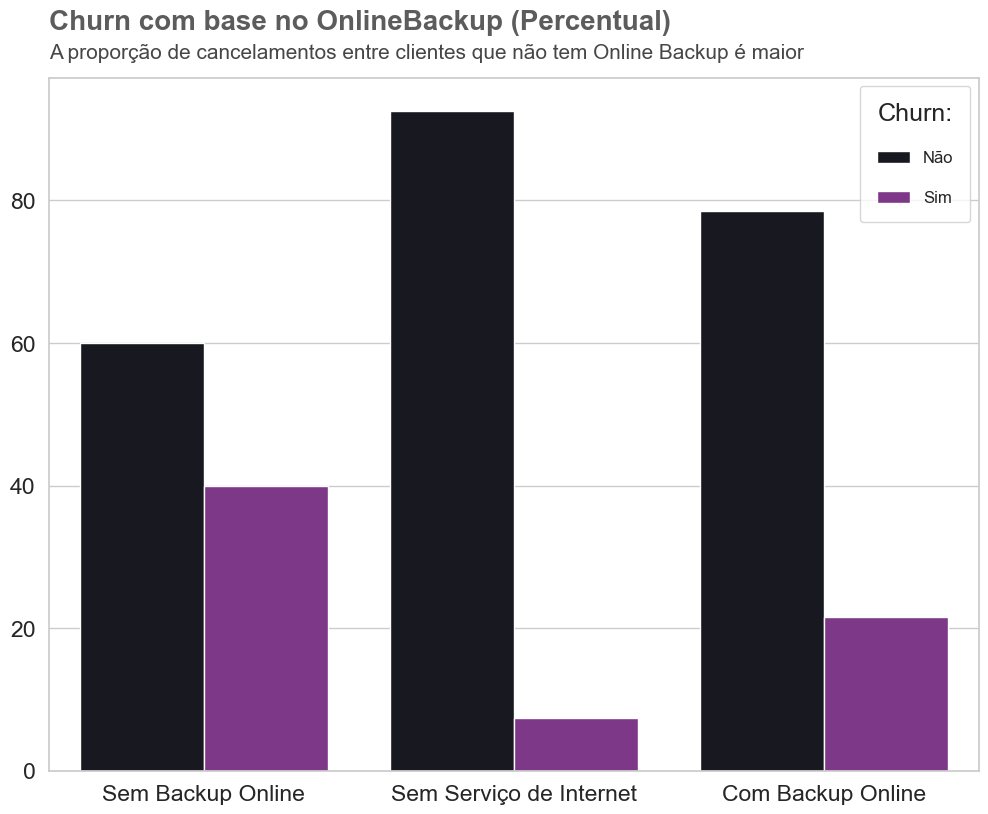

In [90]:
plt.figure(figsize = (12,9))
chart = sns.barplot(data = tb_lista[8],
                    x = 'OnlineBackup',
                    y = 'Percentual(%)',
                    hue= 'Churn')

sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))
chart.set_xlabel("")
chart.set_ylabel("")
chart.set_xticklabels(["Sem Backup Online", "Sem Serviço de Internet", "Com Backup Online"])

leg = plt.legend(loc = 'upper right',
           borderpad = 1.0,
           labelspacing = 1.5,
           fontsize = 12,
           title = 'Churn:')

leg.get_texts()[0].set_text("Não")

leg.get_texts()[1].set_text("Sim")


chart.text(x = -0.5,
          y = 104,
          s = "Churn com base no OnlineBackup (Percentual)",
          fontsize = 20,
          weight = 'bold',
          alpha = .75)

chart.text(x = -0.5,
          y = 100,
          s = "A proporção de cancelamentos entre clientes que não tem Online Backup é maior",
          fontsize = 15,
          alpha = .85)
plt.show()

### Variável "DeviceProtection" 

In [91]:
tb_lista[9]

,Churn,DeviceProtection,CustomerID_x,CustomerID_y,Percentual(%)
0,0,No,1884,3095,60.872375
1,1,No,1211,3095,39.127625
2,0,No internet service,1413,1526,92.595020
3,1,No internet service,113,1526,7.404980
4,0,Yes,1877,2422,77.497936
5,1,Yes,545,2422,22.502064


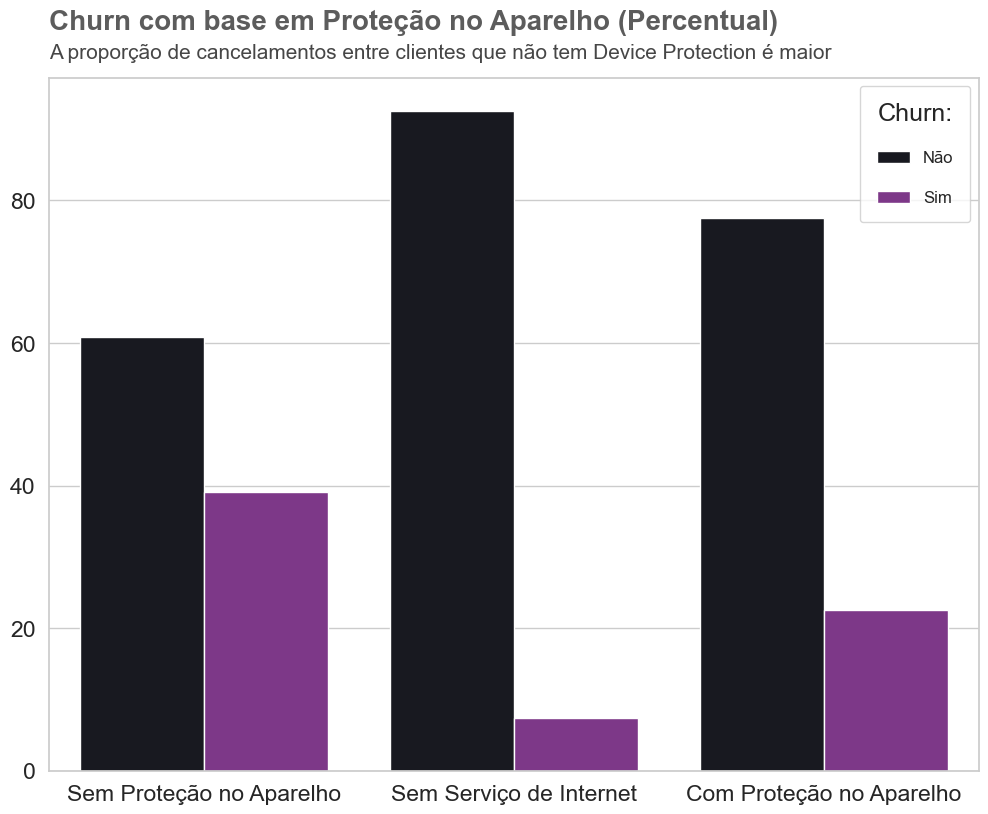

In [92]:
plt.figure(figsize = (12,9))
chart = sns.barplot(data = tb_lista[9],
                    x = 'DeviceProtection',
                    y = 'Percentual(%)',
                    hue= 'Churn')

sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))
chart.set_xlabel("")
chart.set_ylabel("")
chart.set_xticklabels(["Sem Proteção no Aparelho", "Sem Serviço de Internet", "Com Proteção no Aparelho"])

leg = plt.legend(loc = 'upper right',
           borderpad = 1.0,
           labelspacing = 1.5,
           fontsize = 12,
           title = 'Churn:')

leg.get_texts()[0].set_text("Não")

leg.get_texts()[1].set_text("Sim")


chart.text(x = -0.5,
          y = 104,
          s = "Churn com base em Proteção no Aparelho (Percentual)",
          fontsize = 20,
          weight = 'bold',
          alpha = .75)

chart.text(x = -0.5,
          y = 100,
          s = "A proporção de cancelamentos entre clientes que não tem Device Protection é maior",
          fontsize = 15,
          alpha = .85)
plt.show()

###  Variável "TechSupport" 

In [93]:
tb_lista[10]

,Churn,TechSupport,CustomerID_x,CustomerID_y,Percentual(%)
0,0,No,2027,3473,58.364526
1,1,No,1446,3473,41.635474
2,0,No internet service,1413,1526,92.595020
3,1,No internet service,113,1526,7.404980
4,0,Yes,1734,2044,84.833659
5,1,Yes,310,2044,15.166341


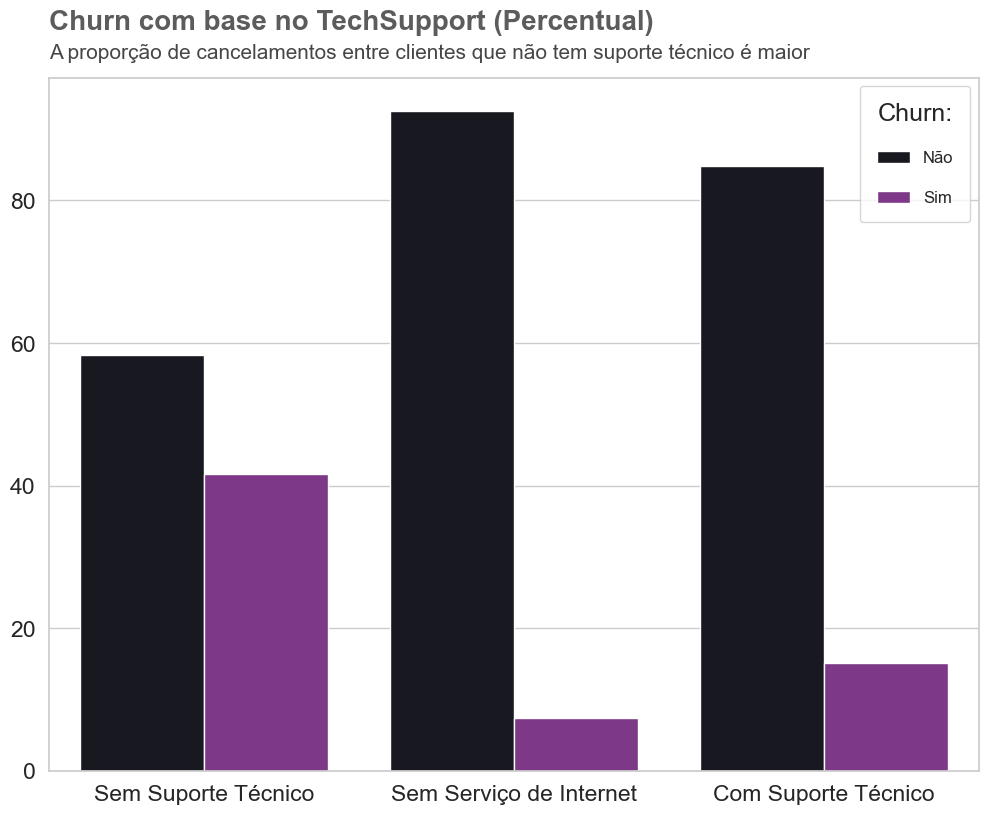

In [94]:
plt.figure(figsize = (12,9))
chart = sns.barplot(data = tb_lista[10],
                    x = 'TechSupport',
                    y = 'Percentual(%)',
                    hue= 'Churn')

sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))
chart.set_xlabel("")
chart.set_ylabel("")
chart.set_xticklabels(["Sem Suporte Técnico", "Sem Serviço de Internet", "Com Suporte Técnico"])


leg = plt.legend(loc = 'upper right',
           borderpad = 1.0,
           labelspacing = 1.5,
           fontsize = 12,
           title = 'Churn:')

leg.get_texts()[0].set_text("Não")

leg.get_texts()[1].set_text("Sim")


chart.text(x = -0.5,
          y = 104,
          s = "Churn com base no TechSupport (Percentual)",
          fontsize = 20,
          weight = 'bold',
          alpha = .75)

chart.text(x = -0.5,
          y = 100,
          s = "A proporção de cancelamentos entre clientes que não tem suporte técnico é maior",
          fontsize = 15,
          alpha = .85)
plt.show()

###  Variável "StreamingTV" 

In [95]:
tb_lista[11]

,Churn,StreamingTV,CustomerID_x,CustomerID_y,Percentual(%)
0,0,No,1868,2810,66.476868
1,1,No,942,2810,33.523132
2,0,No internet service,1413,1526,92.595020
3,1,No internet service,113,1526,7.404980
4,0,Yes,1893,2707,69.929812
5,1,Yes,814,2707,30.070188


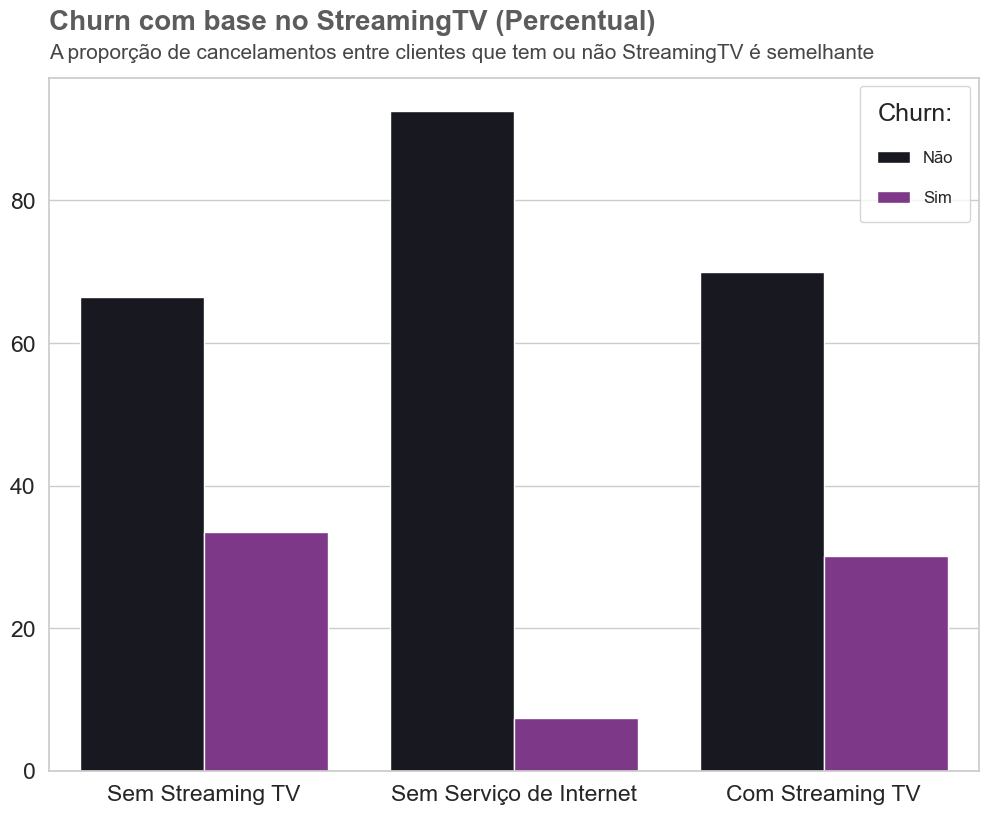

In [96]:
plt.figure(figsize = (12,9))
chart = sns.barplot(data = tb_lista[11],
                    x = 'StreamingTV',
                    y = 'Percentual(%)',
                    hue= 'Churn')

sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))
chart.set_xlabel("")
chart.set_ylabel("")
chart.set_xticklabels(["Sem Streaming TV", "Sem Serviço de Internet", "Com Streaming TV"])

leg = plt.legend(loc = 'upper right',
           borderpad = 1.0,
           labelspacing = 1.5,
           fontsize = 12,
           title = 'Churn:')

leg.get_texts()[0].set_text("Não")

leg.get_texts()[1].set_text("Sim")


chart.text(x = -0.5,
          y = 104,
          s = "Churn com base no StreamingTV (Percentual)",
          fontsize = 20,
          weight = 'bold',
          alpha = .75)

chart.text(x = -0.5,
          y = 100,
          s = "A proporção de cancelamentos entre clientes que tem ou não StreamingTV é semelhante",
          fontsize = 15,
          alpha = .85)
plt.show()

###  Variável "StreamingMusic" 

In [97]:
tb_lista[12]

,Churn,StreamingMovies,CustomerID_x,CustomerID_y,Percentual(%)
0,0,No,1847,2785,66.319569
1,1,No,938,2785,33.680431
2,0,No internet service,1413,1526,92.595020
3,1,No internet service,113,1526,7.404980
4,0,Yes,1914,2732,70.058565
5,1,Yes,818,2732,29.941435


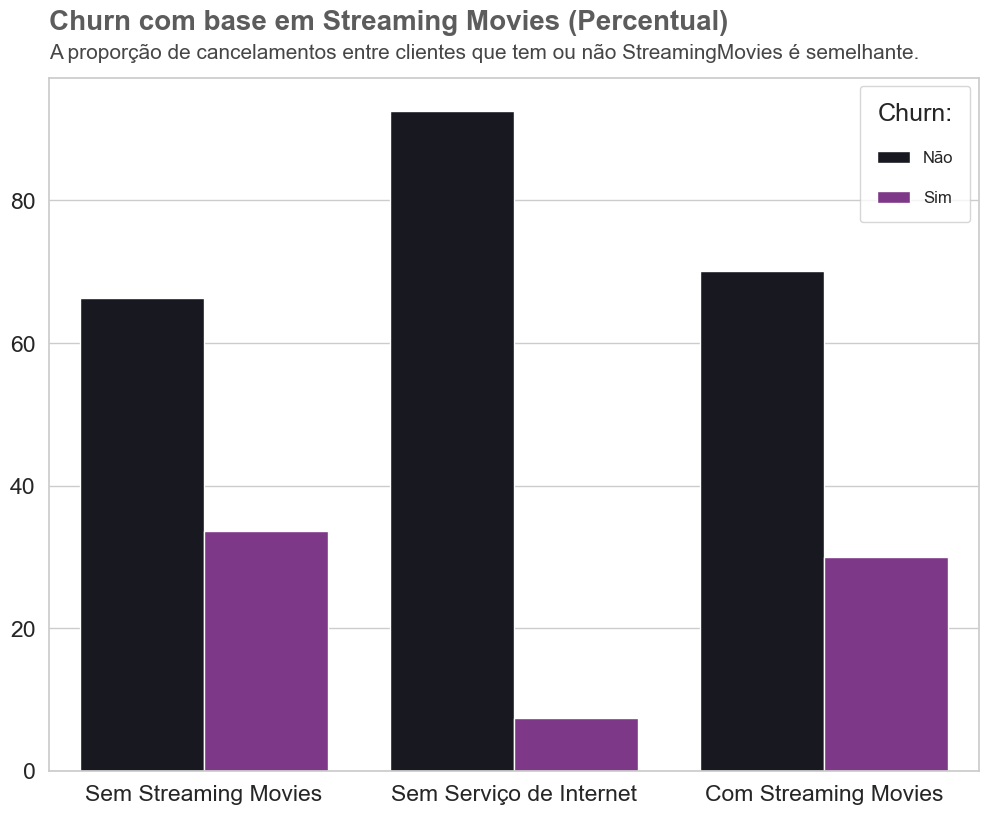

In [98]:
plt.figure(figsize = (12,9))
chart = sns.barplot(data = tb_lista[12],
                    x = 'StreamingMovies',
                    y = 'Percentual(%)',
                    hue= 'Churn')

sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))
chart.set_xlabel("")
chart.set_ylabel("")
chart.set_xticklabels(["Sem Streaming Movies", "Sem Serviço de Internet", "Com Streaming Movies"])

leg = plt.legend(loc = 'upper right',
           borderpad = 1.0,
           labelspacing = 1.5,
           fontsize = 12,
           title = 'Churn:')

leg.get_texts()[0].set_text("Não")

leg.get_texts()[1].set_text("Sim")


chart.text(x = -0.5,
          y = 104,
          s = "Churn com base em Streaming Movies (Percentual)",
          fontsize = 20,
          weight = 'bold',
          alpha = .75)

chart.text(x = -0.5,
          y = 100,
          s = "A proporção de cancelamentos entre clientes que tem ou não StreamingMovies é semelhante.",
          fontsize = 15,
          alpha = .85)
plt.show()

###  Variável "Contract" 

In [99]:
tb_lista[13]

,Churn,Contract,CustomerID_x,CustomerID_y,Percentual(%)
0,0,Month-to-month,2220,3875,57.290323
1,1,Month-to-month,1655,3875,42.709677
2,0,One year,1307,1473,88.730482
3,1,One year,166,1473,11.269518
4,0,Two year,1647,1695,97.168142
5,1,Two year,48,1695,2.831858


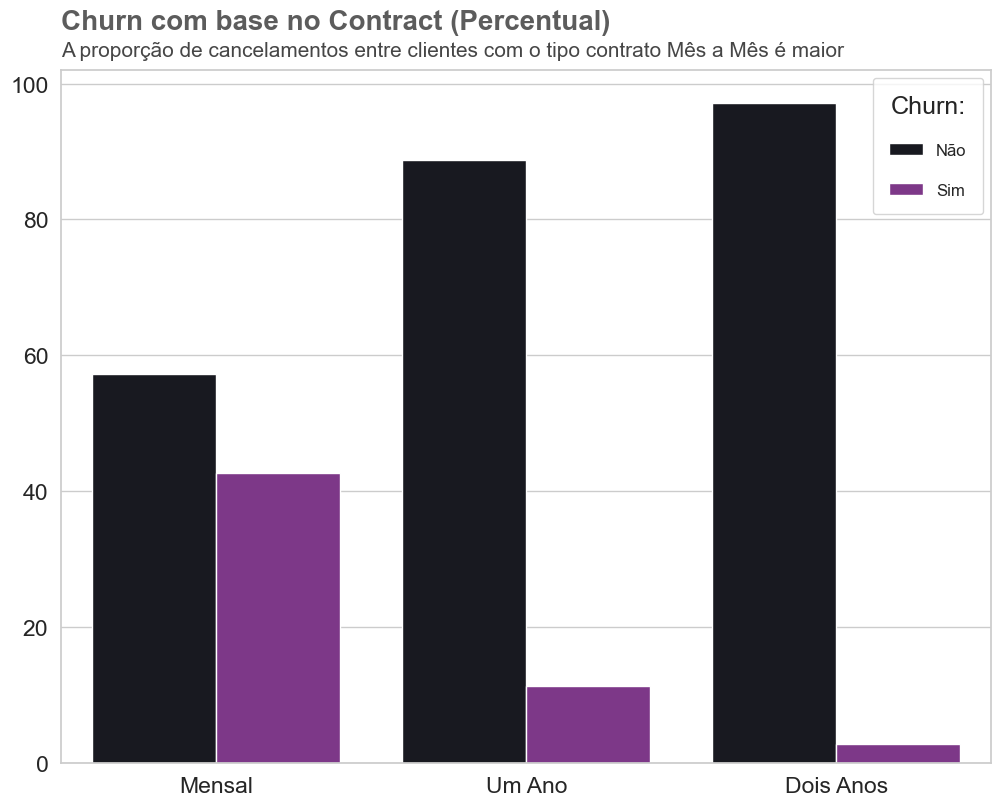

In [100]:
plt.figure(figsize = (12,9))
chart = sns.barplot(data = tb_lista[13],
                    x = 'Contract',
                    y = 'Percentual(%)',
                    hue= 'Churn')

sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))
chart.set_xlabel("")
chart.set_ylabel("")
chart.set_xticklabels(["Mensal", "Um Ano", "Dois Anos"])

leg = plt.legend(loc = 'upper right',
           borderpad = 1.0,
           labelspacing = 1.5,
           fontsize = 12,
           title = 'Churn:')

leg.get_texts()[0].set_text("Não")

leg.get_texts()[1].set_text("Sim")


chart.text(x = -0.5,
          y = 108,
          s = "Churn com base no Contract (Percentual)",
          fontsize = 20,
          weight = 'bold',
          alpha = .75)

chart.text(x = -0.5,
          y = 104,
          s = "A proporção de cancelamentos entre clientes com o tipo contrato Mês a Mês é maior",
          fontsize = 15,
          alpha = .85)
plt.show()

###  Variável "PaperlessBillings" 

In [101]:
tb_lista[14]

,Churn,PaperlessBilling,CustomerID_x,CustomerID_y,Percentual(%)
0,0,No,2403,2872,83.669916
1,1,No,469,2872,16.330084
2,0,Yes,2771,4171,66.434908
3,1,Yes,1400,4171,33.565092


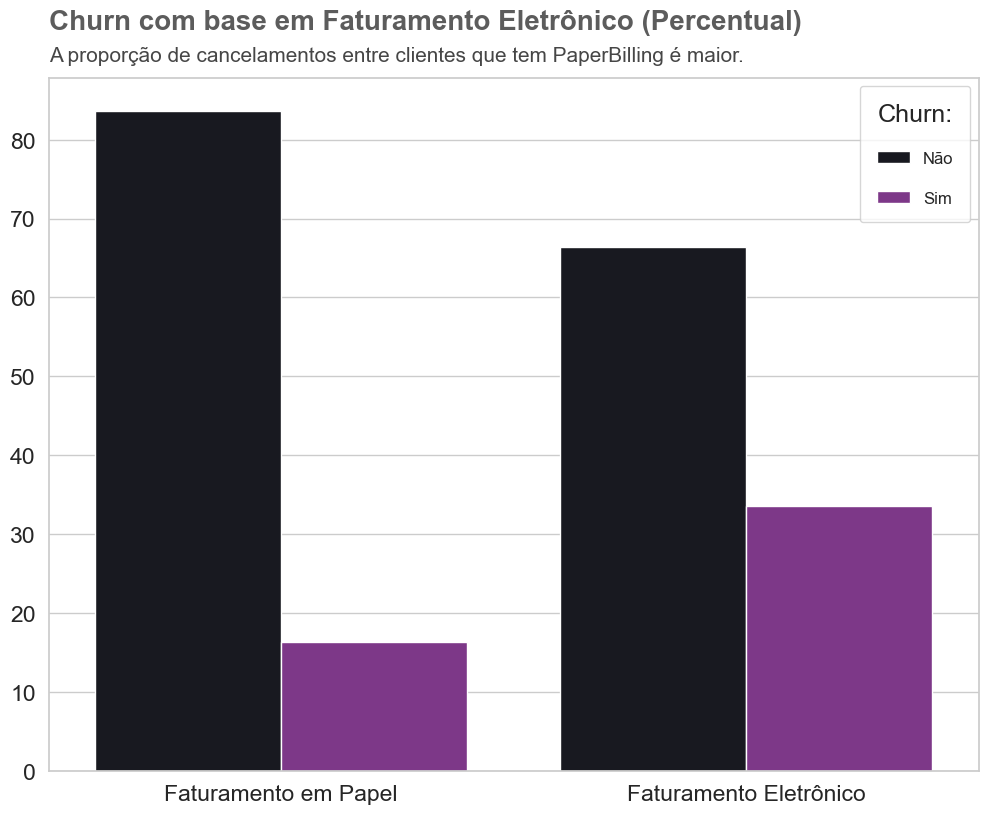

In [102]:
plt.figure(figsize = (12,9))
chart = sns.barplot(data = tb_lista[14],
                    x = 'PaperlessBilling',
                    y = 'Percentual(%)',
                    hue= 'Churn')

sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))
chart.set_xlabel("")
chart.set_ylabel("")
chart.set_xticklabels(["Faturamento em Papel", "Faturamento Eletrônico"])

leg = plt.legend(loc = 'upper right',
           borderpad = 1.0,
           labelspacing = 1.5,
           fontsize = 12,
           title = 'Churn:')

leg.get_texts()[0].set_text("Não")

leg.get_texts()[1].set_text("Sim")


chart.text(x = -0.5,
          y = 94,
          s = "Churn com base em Faturamento Eletrônico (Percentual)",
          fontsize = 20,
          weight = 'bold',
          alpha = .75)

chart.text(x = -0.5,
          y = 90,
          s = "A proporção de cancelamentos entre clientes que tem PaperBilling é maior.",
          fontsize = 15,
          alpha = .85)
plt.show()

### Variável "PaymentMethod" 

In [103]:
tb_lista[15]

,Churn,PaymentMethod,CustomerID_x,CustomerID_y,Percentual(%)
0,0,Bank transfer (automatic),1286,1544,83.290155
1,1,Bank transfer (automatic),258,1544,16.709845
2,0,Credit card (automatic),1290,1522,84.756899
3,1,Credit card (automatic),232,1522,15.243101
4,0,Electronic check,1294,2365,54.714588
5,1,Electronic check,1071,2365,45.285412
6,0,Mailed check,1304,1612,80.893300
7,1,Mailed check,308,1612,19.106700


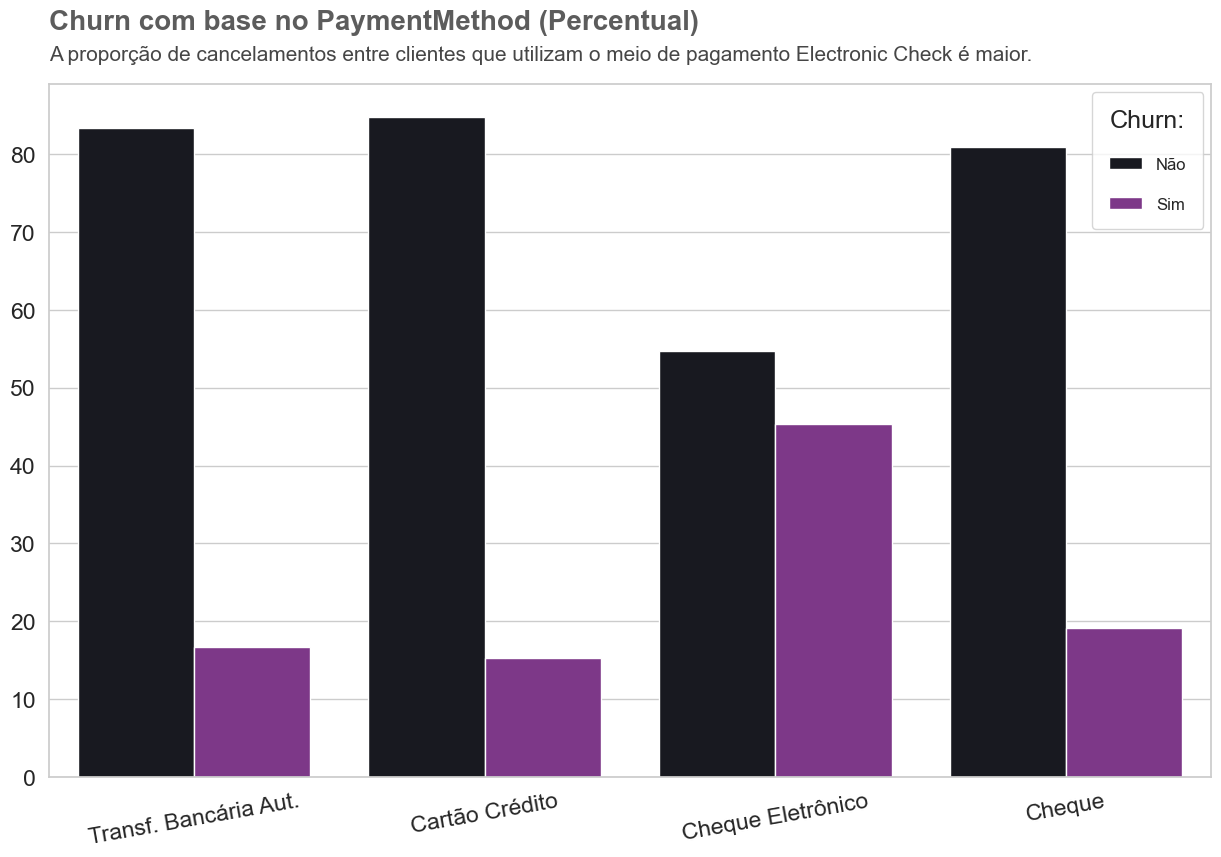

In [104]:
plt.figure(figsize = (15,9))
plt.xticks(rotation = 10)
chart = sns.barplot(data = tb_lista[15],
                    x = 'PaymentMethod',
                    y = 'Percentual(%)',
                    hue= 'Churn')

sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))
chart.set_xlabel("")
chart.set_ylabel("")
chart.set_xticklabels(["Transf. Bancária Aut.", "Cartão Crédito", "Cheque Eletrônico", "Cheque"])


leg = plt.legend(loc = 'upper right',
           borderpad = 1.0,
           labelspacing = 1.5,
           fontsize = 12,
           title = 'Churn:')

leg.get_texts()[0].set_text("Não")

leg.get_texts()[1].set_text("Sim")


chart.text(x = -0.5,
          y = 96,
          s = "Churn com base no PaymentMethod (Percentual)",
          fontsize = 20,
          weight = 'bold',
          alpha = .75)

chart.text(x = -0.5,
          y = 92,
          s = "A proporção de cancelamentos entre clientes que utilizam o meio de pagamento Electronic Check é maior.",
          fontsize = 15,
          alpha = .85)
plt.show()

# Conclusões parciais

Com o teste do Qui-Quadrado, foi verificado que as variáveis <b>"Gender"</b> e <b>"PhoneService"</b> <b>não</b> influenciam a taxa Churn.

Pelos gráficos percentuais isso se confirmou.

No entanto, pelos gráficos, poderíamos considerar também as variáveis "MultipleLines", "StreamingTV" e "StreamingMovies", as diferenças se encontram em quem não possui serviço de internet.

Posteriormente, iremos realizar o teste de importância com uma <b>Decision Tree</b>, para confirmar a importância destas variáveis.

Sobre as variáveis numéricas:

<b>Tenure</b> tem uma <b>correlação negativa fraca</b> com a variável Churn

<b>Monthly</b> tem uma <b>correlação positiva fraca</b> com Churn


<b>Total</b> tem uma <b>correlação negativa fraca</b> com Churn

Pelos gráficos "Boxplot" é possível verificar que não temos outliers nas variáveis numéricas.